# <b><u> Project Title : Seoul Bike Sharing Demand 1

Prediction </u></b>
## <b> Problem Description </b>
### **Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.**
 <img src="https://c0.wallpaperflare.com/preview/744/742/341/action-bicycles-bike-rental-grass.jpg" width="2500" height="650" >



## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Import required modules and Loading our Dataset**

In [5]:
# import the modules required

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')

# **Mount the drive and import the dataset**

In [6]:
# mount the google drive for import dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# loding the dataset of seoul bike data from google driver

path="/content/drive/MyDrive/Capstone_Project/Capstone_Project_02_Supervised ML - Regression/001-ColabNote_and_Data/SeoulBikeData.csv"
bike_df=pd.read_csv(path,encoding ='latin')

# **Understanding Our dataset**

## **Data summary**

### ***Find the head and tail of dataframe***

In [8]:
# view the top 5 row of our dataset 
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [9]:
# view the bottom 5 row of our dataset 
bike_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


### ***Finding the total row and coulmn in the dataset***

In [10]:
#find the shape of our dataset with total number of row and coulumn
print (bike_df.shape)
print (f'Total number of rows in this dataet is :{bike_df.shape[0]}')
print (f'Total number of columns in this dataet is :{bike_df.shape[1]}')

(8760, 14)
Total number of rows in this dataet is :8760
Total number of columns in this dataet is :14


### ***Finding all the coulmn present in the dataframe***

In [11]:
#find all the column name present in the dataset
print ("The features present in the dataset: ")
bike_df.columns



The features present in the dataset: 


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

### ***Information regarding overall dataset***

In [12]:
#check details about the data set
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

## ***Observation on dataset info***

1. Null values/missing values- 0
2. Data column need to covert from object datatype to proper data type.
3. Columns need to convert from object type to numeric type.

  *   List seasons
  *   Holiday
  *   Functioning day
4. Rename column where required
  * Temperature(°C)
   * Humidity(%)
   * Wind speed (m/s)
   * Visibility (10m)
   * Dew point temperature(°C)
   * Solar Radiation (MJ/m2)
   * Rainfall(mm)
   * Snowfall (cm)
   * Rented Bike Count
   *Functioning Day
   
   (Beacuse spaces and variables having units in brackets makes difficult to copy variable name.)





# **Clearing Data Process**
###The most important steps before going for the  EDA(Exploratory Data Analysis)
###As we know clearing data will remove the conflict between any duplicate data/row.



## *We have to do the above data cleaning process through the following steps:-*

###1) Missing values finding and replacing with proper values.
###2)  Adding some required new columns.
###3) Change required column data types from Object to appropriate datatypes.
###4)  Checking duplicate rows in dataset.

In [13]:
bike_df['Date']=bike_df['Date'].astype("datetime64[ns]")



In [14]:
#cheking the columns 
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [15]:
bike_df.duplicated().sum()
bike_df.isnull().sum().sum()

0

In [16]:
#As column name contain space and variables having units in brackets we have to change it for better understanding
bike_df.rename(columns={'Rented Bike Count':'Rented_Bike_Count','Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Wind speed (m/s)':'Wind_speed',
                       'Visibility (10m)':'Visibility','Dew point temperature(°C)':'Dew_point_temperature', 'Solar Radiation (MJ/m2)':'Solar_Radiation',
                        'Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall','Functioning Day':'Functioning_Day'}, inplace=True) 

In [17]:
#check details about the data set
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   Rented_Bike_Count      8760 non-null   int64         
 2   Hour                   8760 non-null   int64         
 3   Temperature            8760 non-null   float64       
 4   Humidity               8760 non-null   int64         
 5   Wind_speed             8760 non-null   float64       
 6   Visibility             8760 non-null   int64         
 7   Dew_point_temperature  8760 non-null   float64       
 8   Solar_Radiation        8760 non-null   float64       
 9   Rainfall               8760 non-null   float64       
 10  Snowfall               8760 non-null   float64       
 11  Seasons                8760 non-null   object        
 12  Holiday                8760 non-null   object        
 13  Fun

In [18]:
bike_df['Year'] = bike_df['Date'].dt.year
bike_df['Month']=bike_df['Date'].dt.month
bike_df['Day']=bike_df['Date'].dt.day_name()


In [19]:
#set weekend is 1 and weekdays 0
bike_df['Weekdays_or_weekend']=bike_df['Day'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)

In [20]:
#check new data set
bike_df.head(5)

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Year,Month,Day,Weekdays_or_weekend
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday,0
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday,0
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday,0
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday,0
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,Thursday,0


In [21]:
#Drop the Date and Day column
bike_df.drop(['Date','Day'], axis=1, inplace =True)


In [22]:
#check details about the data set
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  Year                   8760 non-null   int64  
 14  Month                  8760 non-null   int64  
 15  Week

In [23]:
bike_df.head(5)

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Year,Month,Weekdays_or_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,0


## ***Checking each column data value***

In [24]:
#Change the int64 column into catagory column
cols=['Hour','Month','Weekdays_or_weekend','Year']
for col in cols:
  bike_df[col]=bike_df[col].astype('category')

In [25]:
#Get distinct categories counts for Holiday categories
bike_df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [26]:
#Get distinct categories counts for Seasons categories
bike_df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [27]:
#Get distinct categories counts for Functioning_Day categories
bike_df['Functioning_Day'].value_counts()

Yes    8465
No      295
Name: Functioning_Day, dtype: int64

In [28]:
#Get distinct categories counts for Weekdays_or_weekend categories
bike_df['Weekdays_or_weekend'].value_counts()

0    6216
1    2544
Name: Weekdays_or_weekend, dtype: int64

In [29]:
#Get distinct categories counts for Month categories
bike_df['Month'].value_counts()

1     744
3     744
5     744
7     744
8     744
10    744
12    744
4     720
6     720
9     720
11    720
2     672
Name: Month, dtype: int64

In [30]:
#checking the Summary of bike dataset
bike_df.describe()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [31]:
#checking the Null value
bike_df.isnull().sum()
# print(f"We have {duplicates} rows in our Bike Data.")

Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
Year                     0
Month                    0
Weekdays_or_weekend      0
dtype: int64

Text(0.5, 1.0, ' Visualising Missing Values')

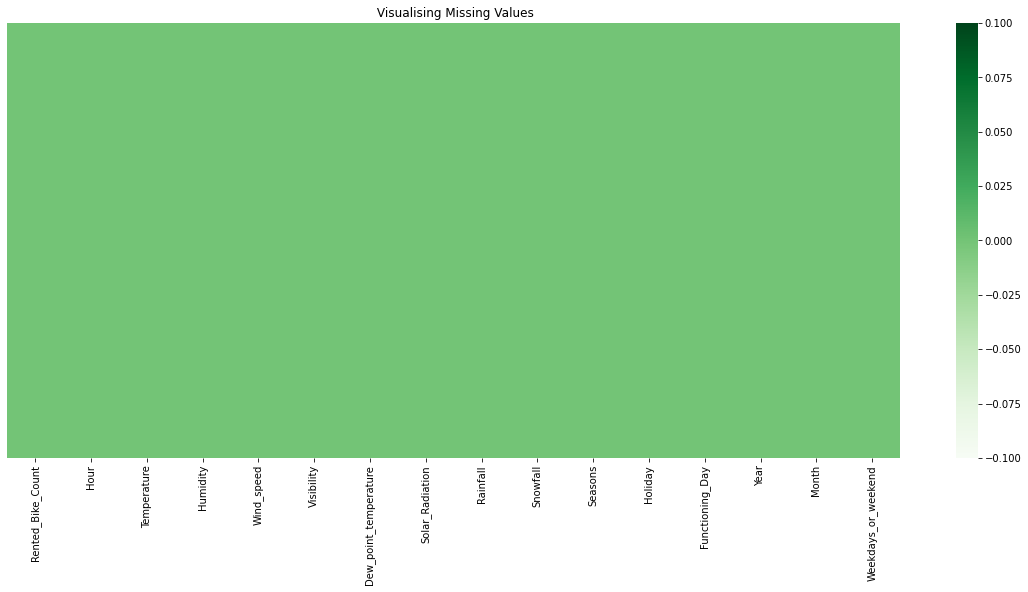

In [32]:
# Visulaizing null values using heatmap.
plt.figure(figsize=(20,8))
sns.heatmap(bike_df.isnull(),cmap='Greens',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

## There is No Null values in the Dataset.

## ***Duplicate value checking***

In [33]:
#checkimg Duplicate rows in BikeData.

duplicates=bike_df.duplicated().sum()
print(f"We have {duplicates} rows in our Bike Data.")

# No duplicate rows found

We have 0 rows in our Bike Data.


# **Performing Exploratory Data Analysis------>EDA**

**Why do we perform EDA?**

* An EDA is a thorough examination meant to uncover the 
underlying structure of a data set and is important for a company because it exposes trends, patterns, and relationships that are not readily apparent.

# **Univariate Analysis**

**Why do you do univariate analysis?**
* The key objective of Univariate analysis is to simply describe the data to find patterns within the data.

## **Analysis of Dependent Variable:**

**What is a dependent variable in data analysis?**
* A dependent variable is a variable whose value will change depending on the value of another variable. In analysis we do work around this variable.In simple word they are depends upon other value.

# **Analysis of Independent variable wrt Dependent variable**


**1.Categorical variables**

**2.Numerical variables**




# **Categorical variables**

**What is a categorical variables in data analysis?**
* A categorical variable (sometimes called a nominal variable) is one that has two or more categories, but there is no intrinsic ordering to the categories.
*Our dependent variable is "Rented Bike Count" so we need to analysis this column with the other columns by using some visualisation plot.first we analyze the category data tyep then we proceed with the numerical data type.

## **1. Rented bike vs Month**

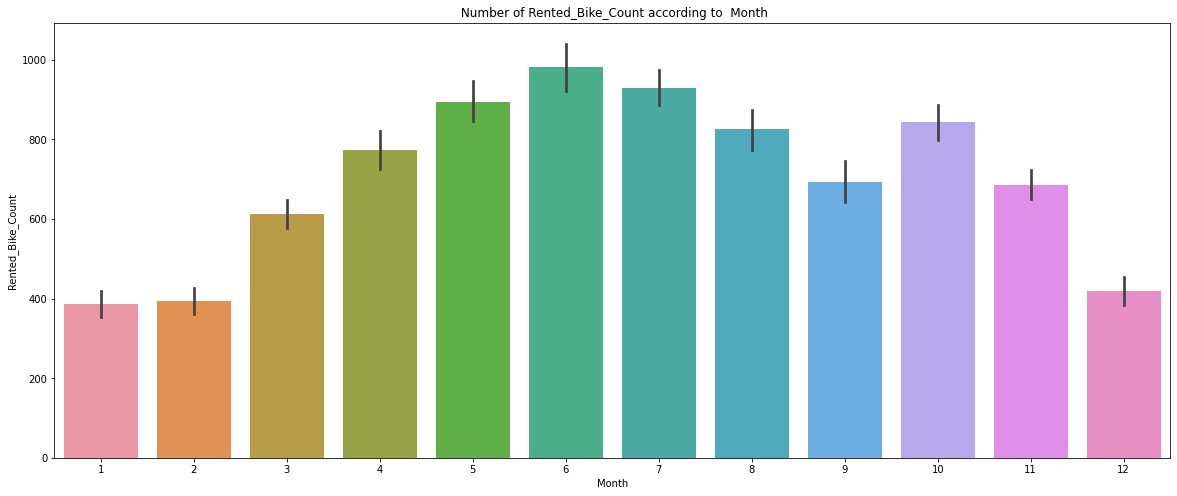

In [34]:
# Give a size 
fig,ax=plt.subplots(figsize=(20,8))

# Rented_Bike_Count v/s Month barplot
sns.barplot(data = bike_df,x = 'Month',y = 'Rented_Bike_Count',)

# Show the plot
plt.title(' Number of Rented_Bike_Count according to  Month')
plt.show()




*   From the above bar plot is clearly showing that from jan to jun demand for the rented bike is growing high and then slowly the demand start droping till Sep and than again a small demand increase for some a month and then it decrease.







## **2.Rented bikes according to weekdays and weekend**


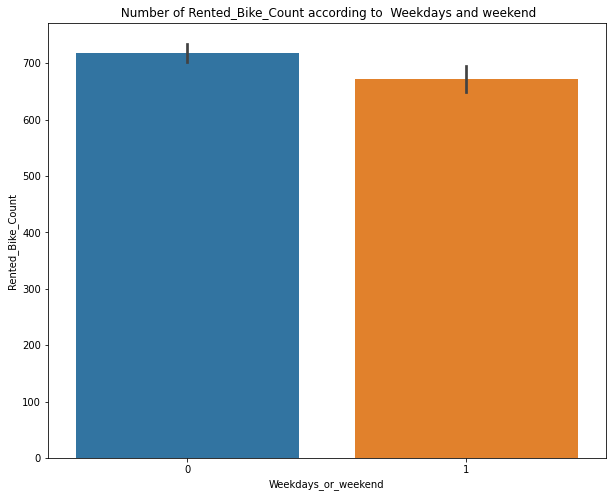

In [35]:
# Give a size 
fig,ax=plt.subplots(figsize=(10,8))

# Rented_Bike_Count v/s Weekdays_or_weekend barplot
sns.barplot(data = bike_df,x = 'Weekdays_or_weekend',y = 'Rented_Bike_Count',)

# Show the plot
plt.title(' Number of Rented_Bike_Count according to  Weekdays and weekend')
plt.show()

## **3.Rented bikes demand wrt hour on weekdays and weekends** 

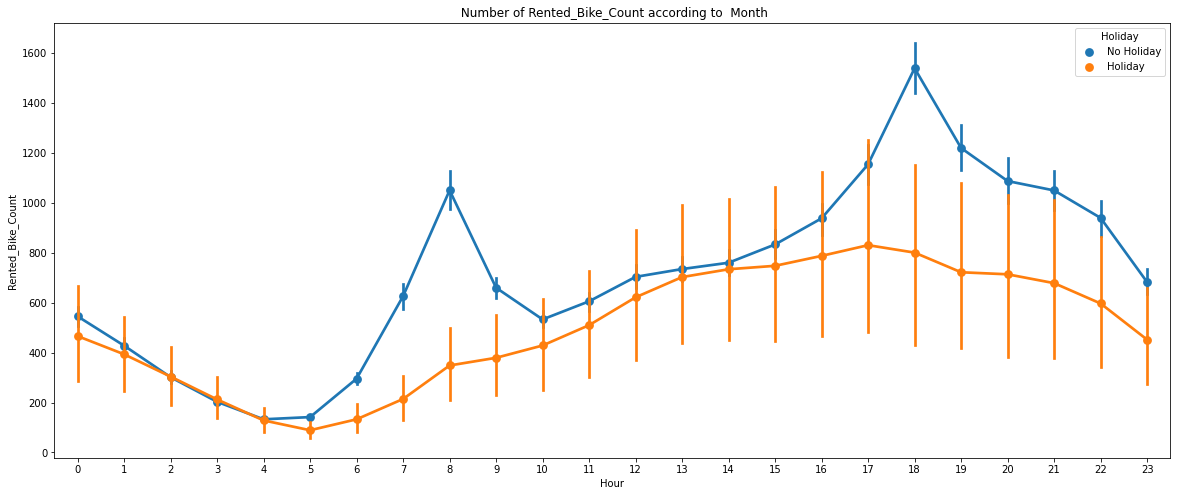

In [36]:
# Give a size 
fig,ax=plt.subplots(figsize=(20,8))

# Rented_Bike_Count v/s Holiday and No-Holiday barplot in hourly
sns.pointplot(data = bike_df,x = 'Hour',y = 'Rented_Bike_Count',hue='Holiday',ax=ax)

# Show the plot
plt.title(' Number of Rented_Bike_Count according to  Month')
plt.show()

*  ### From this pointplot graph we can see that on holiday ranted bike demand is less as compaired to No-holiday.Between 7am-9am and 5pm-7pm demand of rented bike is high  




## **4.Rented bikes demand wrt Functioning Day** 

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

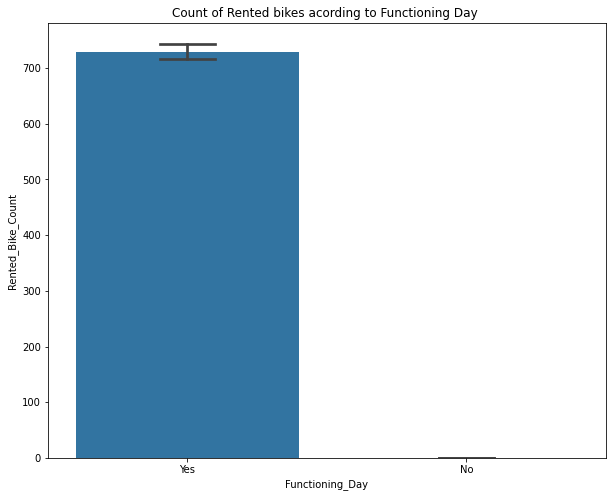

In [37]:
#anlysis of data by vizualisation on function day
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=bike_df,x='Functioning_Day',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

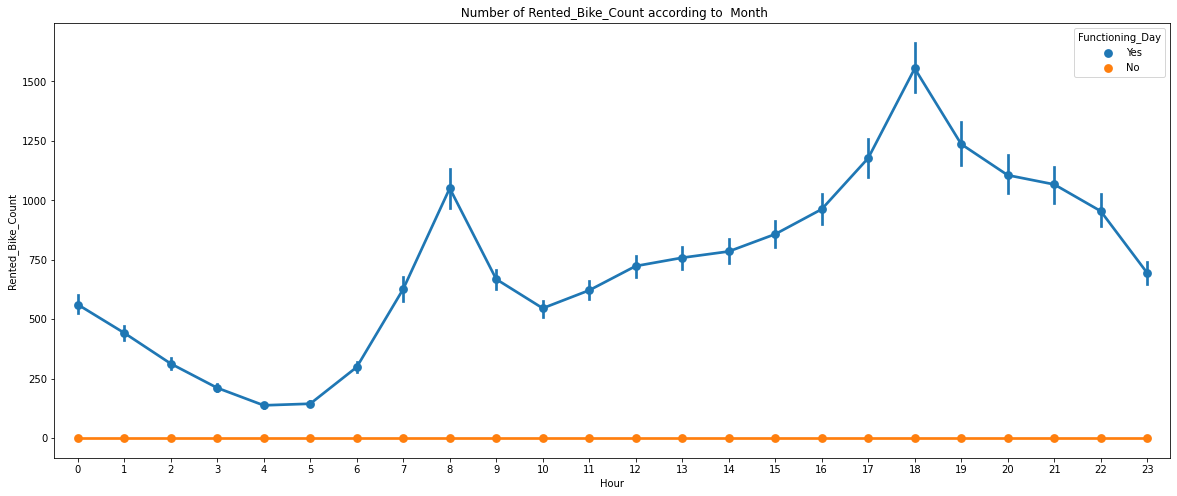

In [38]:
# Give a size 
fig,ax=plt.subplots(figsize=(20,8))

# Rented_Bike_Count v/s Functioning_Day barplot in hourly
sns.pointplot(data = bike_df,x = 'Hour',y = 'Rented_Bike_Count',hue='Functioning_Day',ax=ax)

# Show the plot
plt.title(' Number of Rented_Bike_Count according to  Month')
plt.show()

*  ### In the above bar plot and point plot which shows the use of rented bike in functioning days or not, and it clearly shows that,Peoples dont use reneted bikes in no functioning day.

## **5.Rented bikes demand wrt Season** 

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

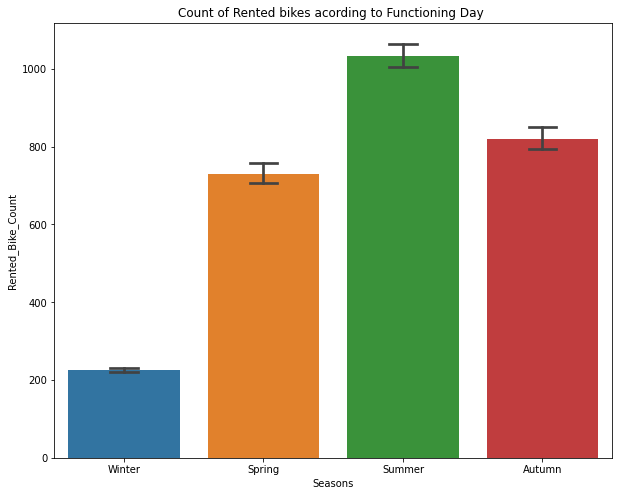

In [39]:
#anlysis of data by vizualisation on season
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=bike_df,x='Seasons',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to seasons ')]

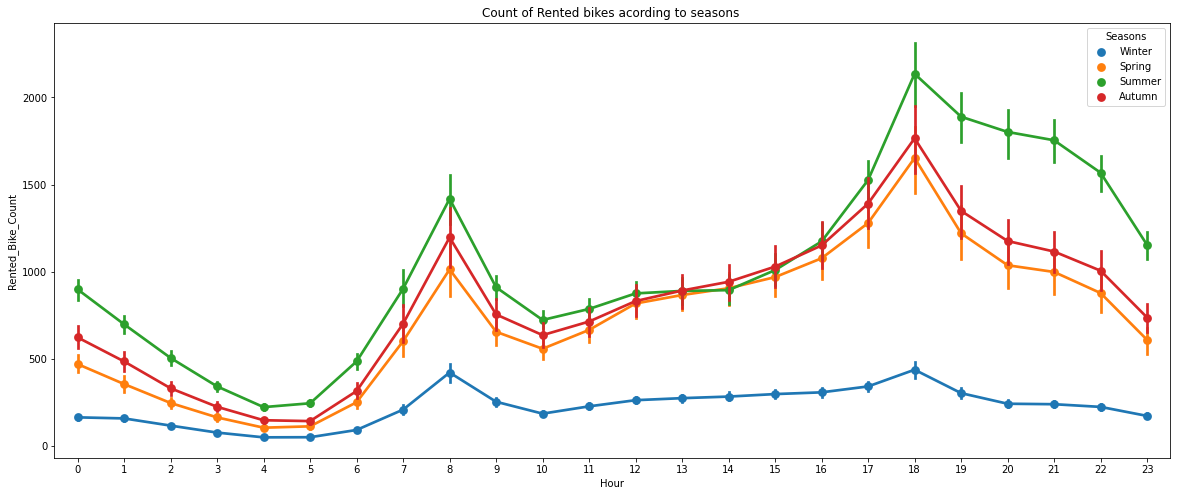

In [40]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Seasons',ax=ax)
ax.set(title='Count of Rented bikes acording to seasons ')


*   ###    Form the bar chart and pointplot we can clearly say that in Summer demand is high as compaired to other season and in winter the demand is lowest.

*   ###    Point chart also tell that in morning from 7-9am and 5-7pm demand is high in every season






## **6.Rented bikes demand wrt hour,**

[Text(0.5, 1.0, 'Count of Rented bikes acording to Hour ')]

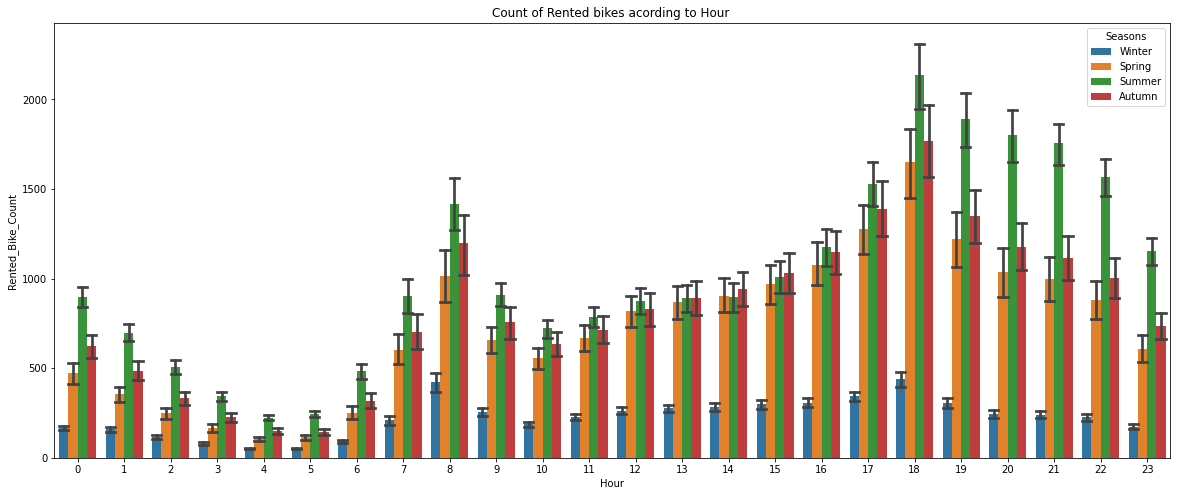

In [41]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=bike_df,x='Hour',y='Rented_Bike_Count',capsize=.2, hue='Seasons')
ax.set(title='Count of Rented bikes acording to Hour ')



*   ### In this barchart the demand of bike is at 8am am and at 6pm is highest. 




# **Numerical variables**

**What is a Numerical variables in data analysis?**
* A numeric variable (also called quantitative variable) is a quantifiable characteristic whose values are numbers.

**Types Numerical variables in data analysis?**
* Numeric variables may be either continuous or discrete.

**What is a Continuous Numerical variables in data analysis?**
* A variable is said to be continuous if it can assume an infinite number of real values within a given interval.

* **Ex-**Weight 56.53Kg..Height 1.61cm

**What is a Discrete Numerical variables in data analysis?**
* As opposed to a continuous variable, a discrete variable can assume only a finite number of real values within a given interval.

* **Ex-**Class 5th, Number of student 20


##**Analyze of Numerical variables**

In [42]:
#assign the numerical coulmn to variavle
numerical_columns=list(bike_df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

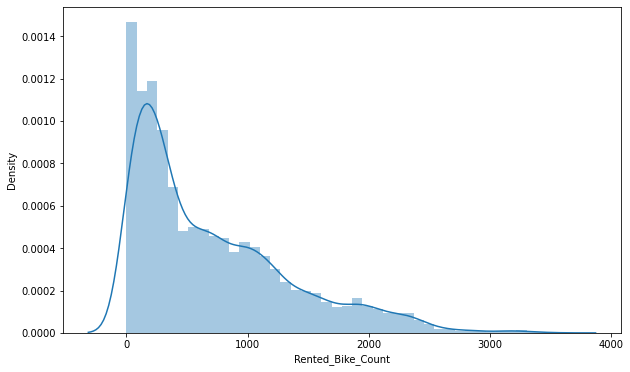

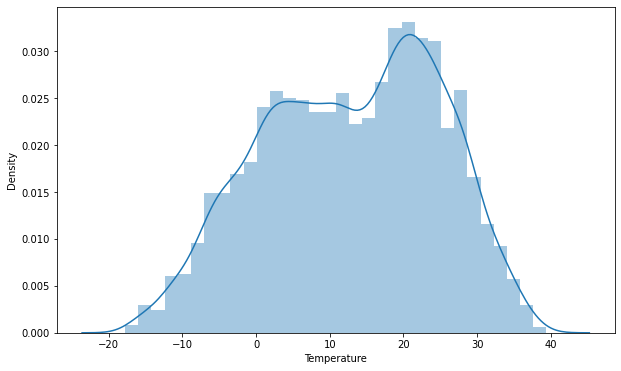

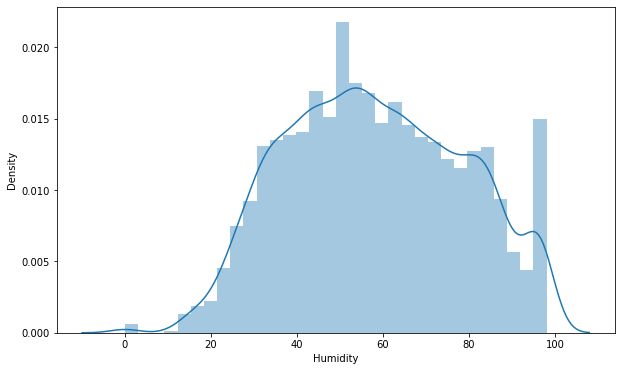

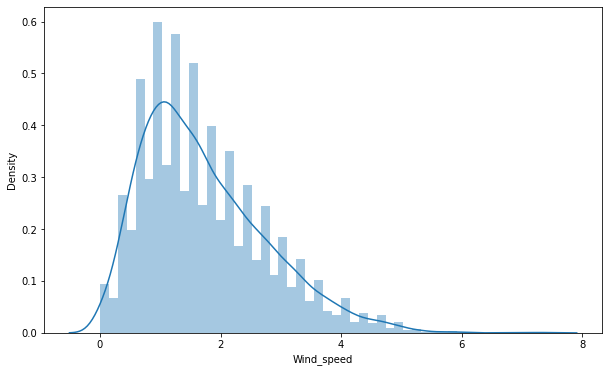

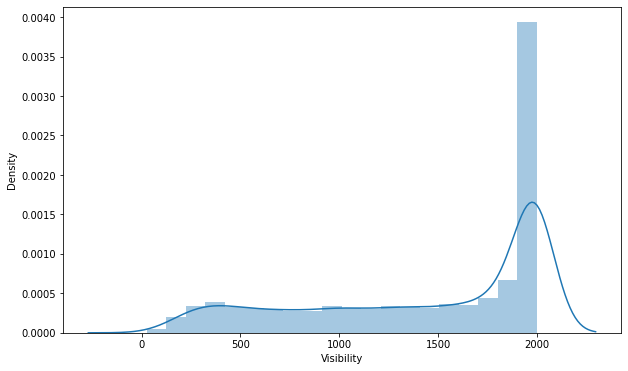

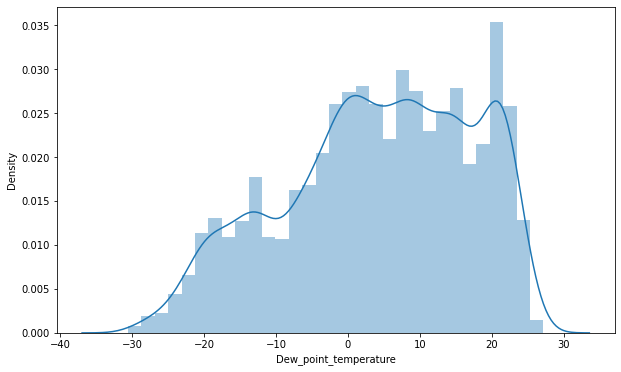

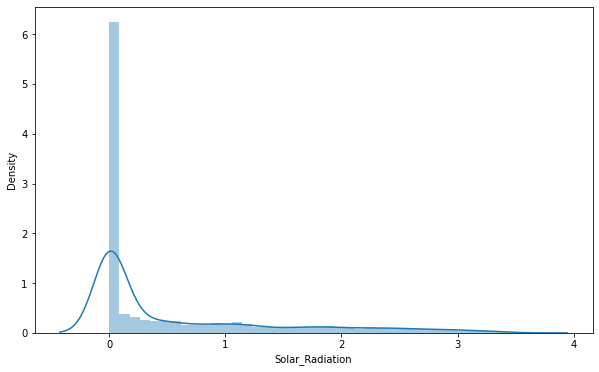

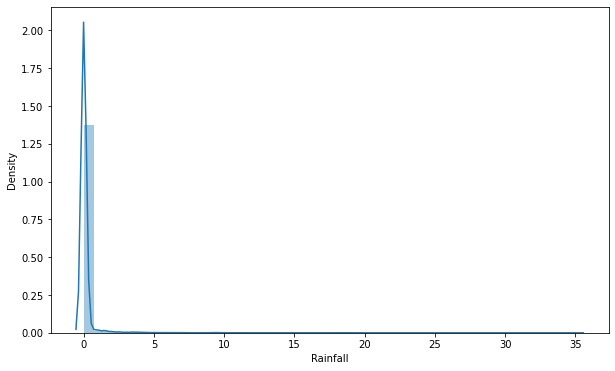

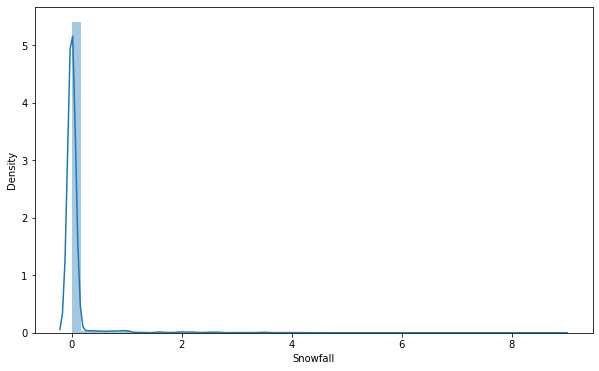

In [43]:
#printing displots to analyze the distribution of all numerical features
for col in numerical_features:
  plt.figure(figsize=(10,6))
  sns.distplot(x=bike_df[col])
  plt.xlabel(col)
plt.show()

## **Numerical vs Rented_Bike_count**

*   ## Relationship between "Rented_Bike_Count" and "Temperature" 

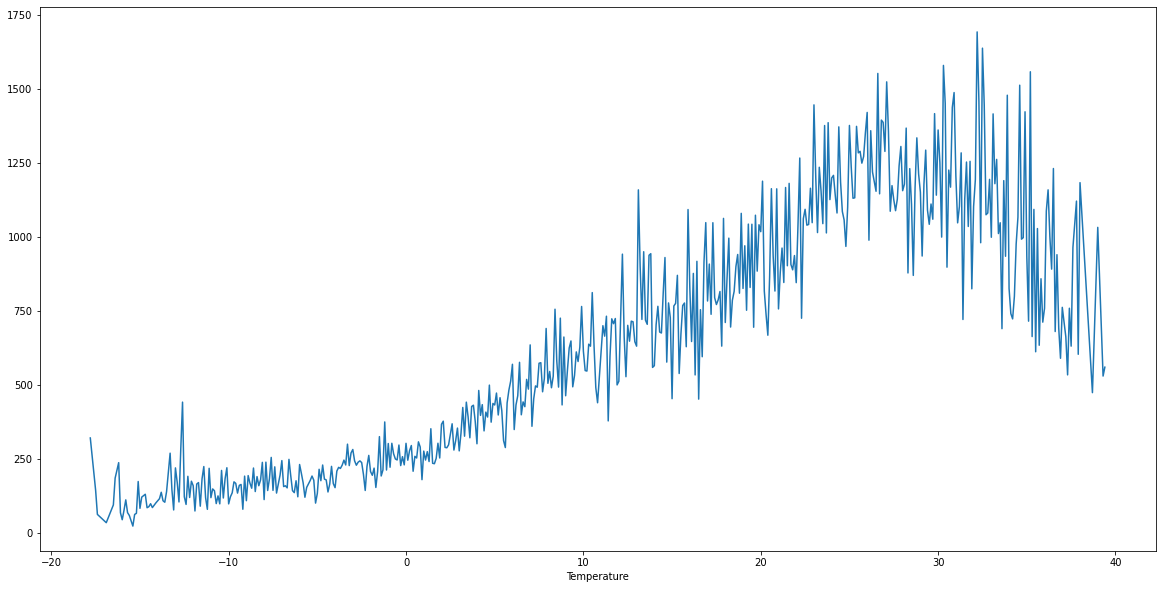

In [44]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Temperature" 
plt.figure(figsize=(20,10))
bike_df.groupby('Temperature').mean()['Rented_Bike_Count'].plot()

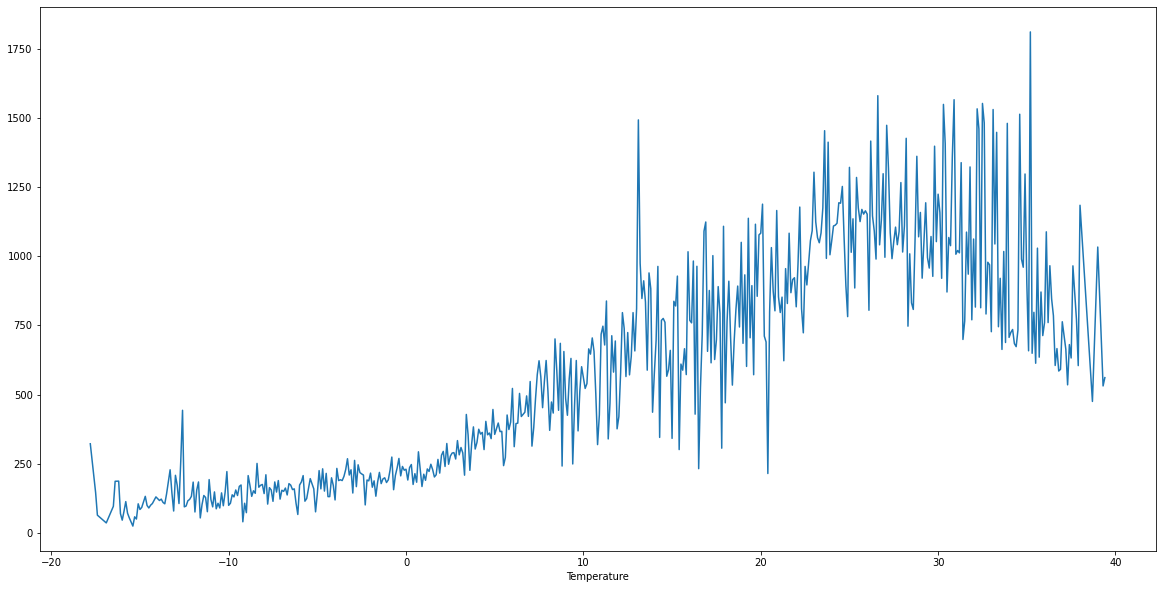

In [45]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Temperature" 
plt.figure(figsize=(20,10))
bike_df.groupby('Temperature').median()['Rented_Bike_Count'].plot()

*   ### **In above plot the demand of rented bike is highest when temperature is around 20°C-30°C.** 

*   ## Relationship between "Rented_Bike_Count" and "Dew_point_temperature" 

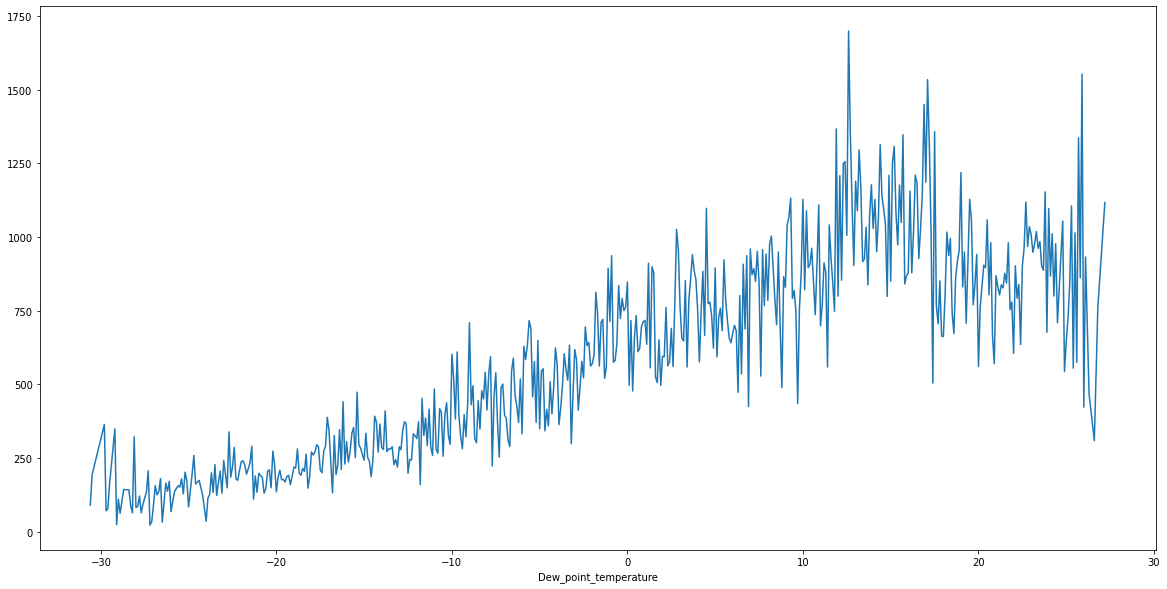

In [46]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Dew_point_temperature" 
plt.figure(figsize=(20,10))
bike_df.groupby('Dew_point_temperature').mean()['Rented_Bike_Count'].plot()
plt.show()

*   ### **This plot the demand of rented bike is highest when dew point temperature is around 20°C-30°C.** 
* ### **This graph also follow same trend as temprature.**


*   ## Relationship between "Rented_Bike_Count" and "Wind_speed" 



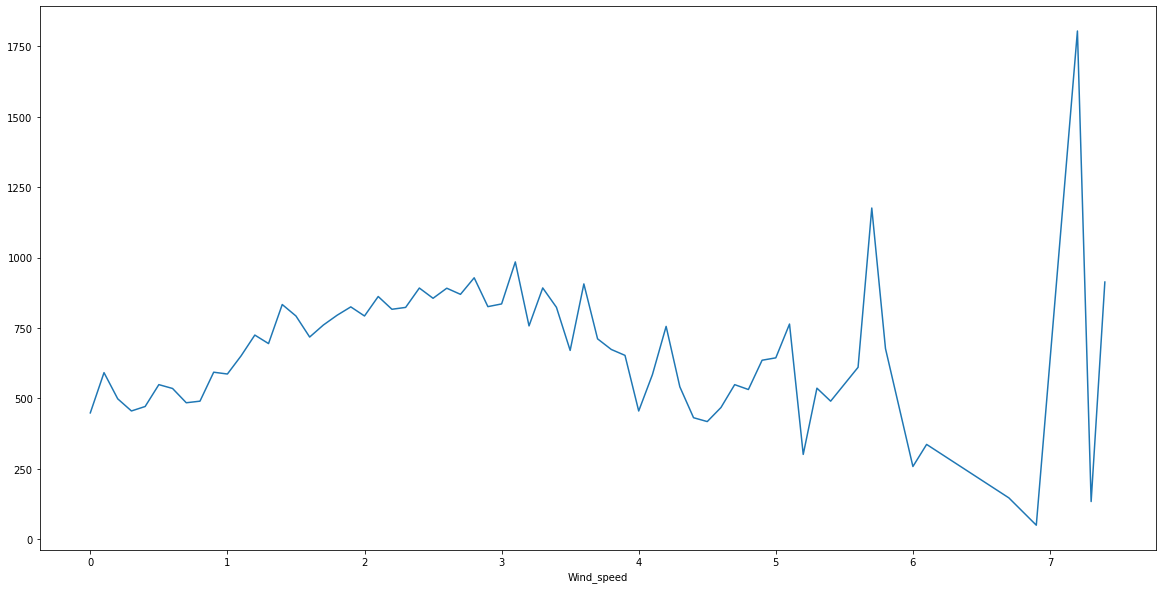

In [47]:
plt.figure(figsize=(20,10))
bike_df.groupby('Wind_speed').mean()['Rented_Bike_Count'].plot()
plt.show()

*   ### **In this plot the demand of rented bike is Same throughout the wind speed/ uniformly distributed but when the wind speed is (5-6)m/s demand rises** 

*   ### **When the wind speed is more then 7 m/s then demand for bike is also increase.** 

*   ### **Here we can say that the patten is very rendom.**









*   ## Relationship between "Rented_Bike_Count" and "Solar_Radiation" 


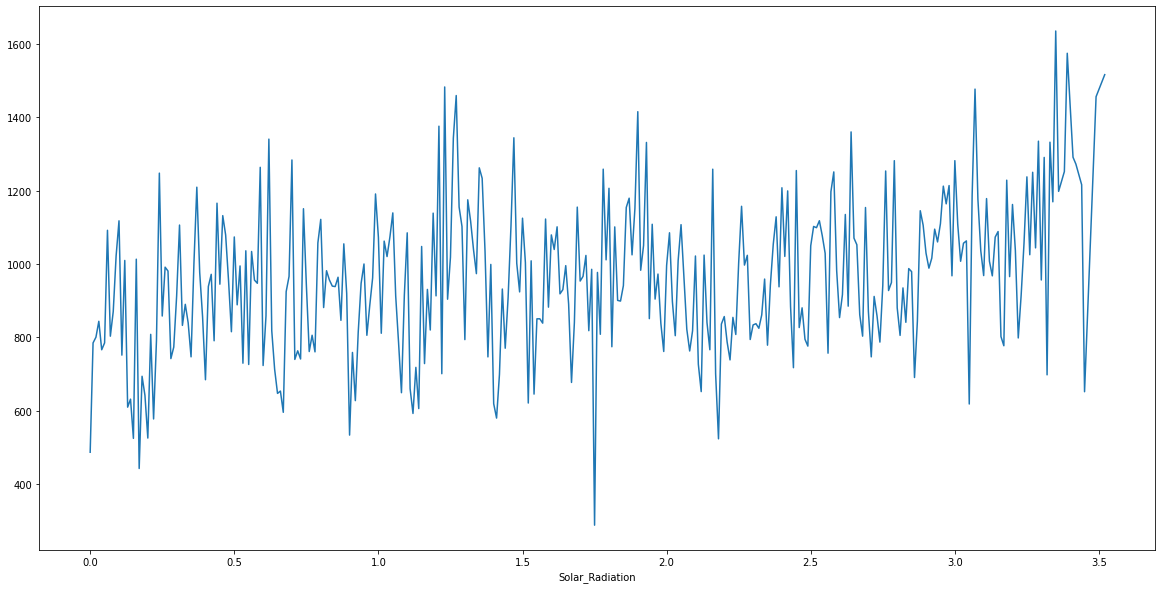

In [48]:
plt.figure(figsize=(20,10))
bike_df.groupby('Solar_Radiation').mean()['Rented_Bike_Count'].plot()
plt.show()

*   ### **In this plot the demand of rented bike is high if there is solar radiation.Mostly the number is around 1000(+/-200)** 




*   ## Relationship between "Rented_Bike_Count" and "Snowfall"

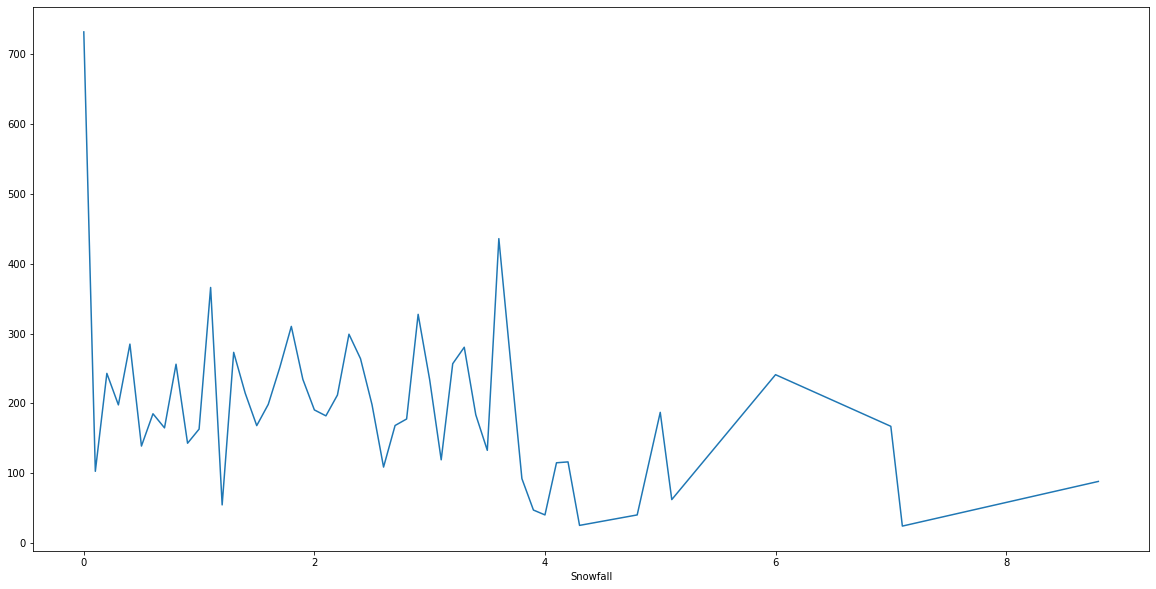

In [49]:
plt.figure(figsize=(20,10))
bike_df.groupby('Snowfall').mean()['Rented_Bike_Count'].plot()
plt.show()

*   ### **In this plot the demand of rented bike is drastically change when snowfall is increase.** 

*   ## Relationship between "Rented_Bike_Count" and "Rainfall"

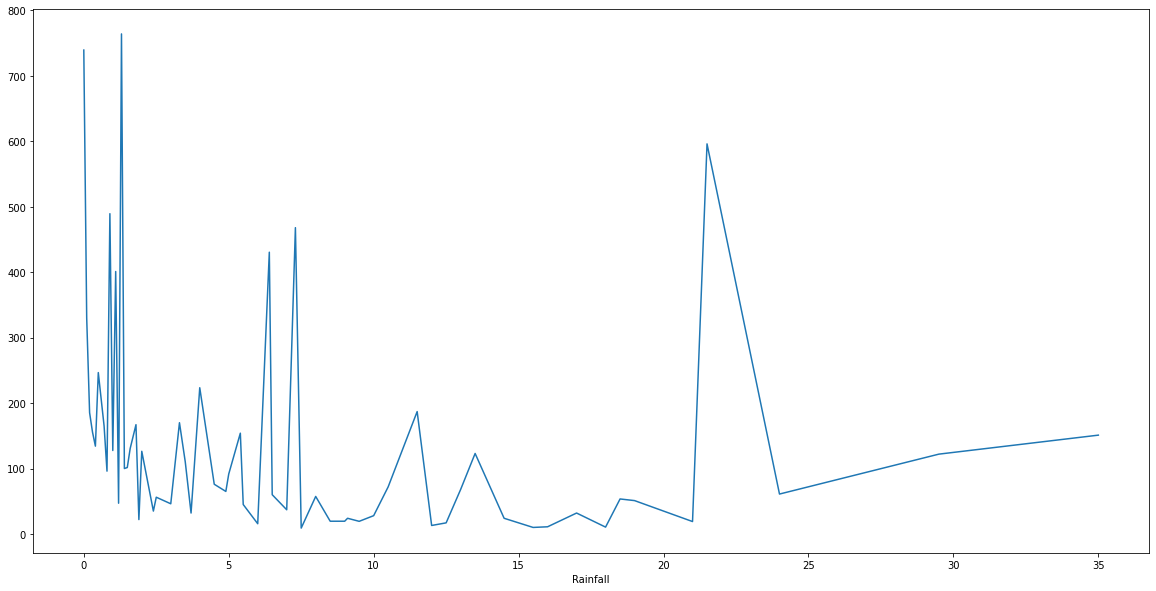

In [50]:
plt.figure(figsize=(20,10))
bike_df.groupby('Rainfall').mean()['Rented_Bike_Count'].plot()
plt.show()

*   ### **We can see from the above plot that even if it rains a lot the demand of of rent bikes is not decreasing,for an example when rain is 20mm of rain big spike of rented bikes** 

# **Regression plot**


##    **1. It is a plot give a visual guide that helps to emphasize patterns in a dataset between two parameter.**
##   **2. Regression lines can be used as a way of visually  the liner relationship between the Independent (x)----->Numerical variables and Dependent variables(y)----->Rented_Bike_Count variables here in the graphs.**



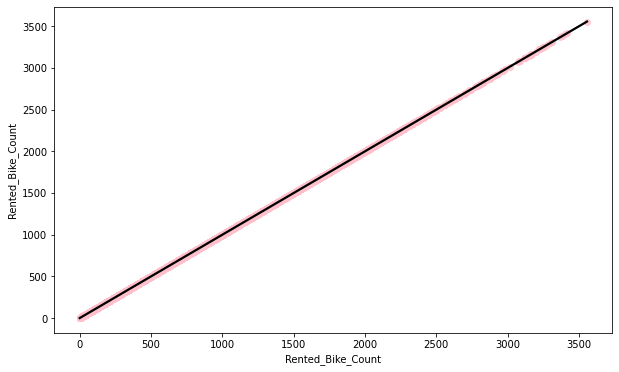

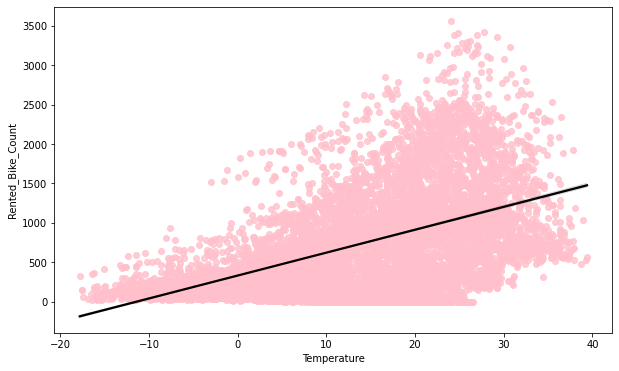

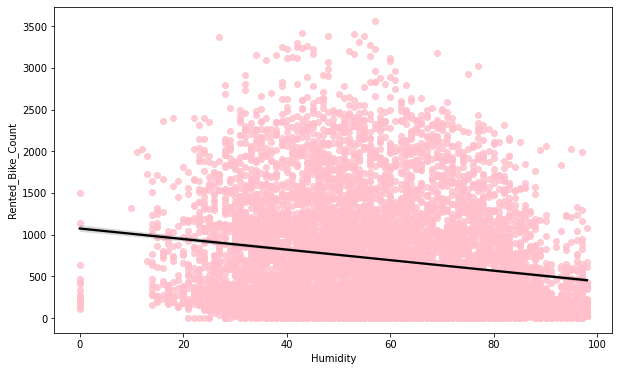

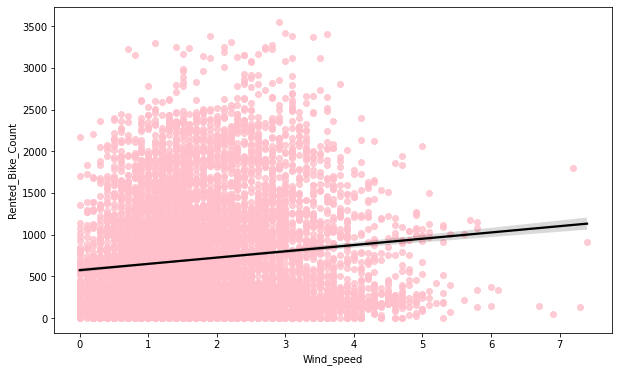

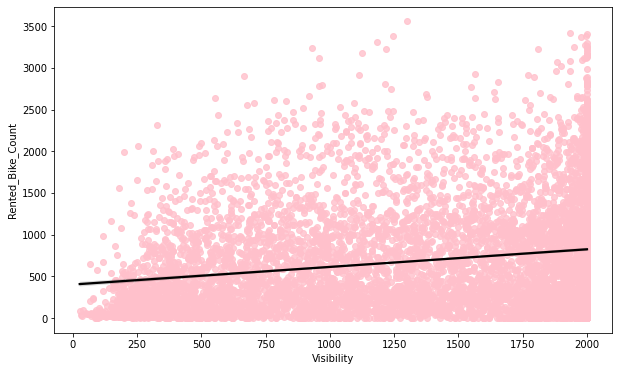

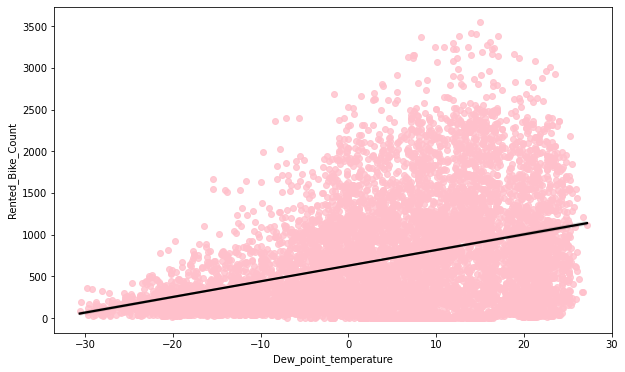

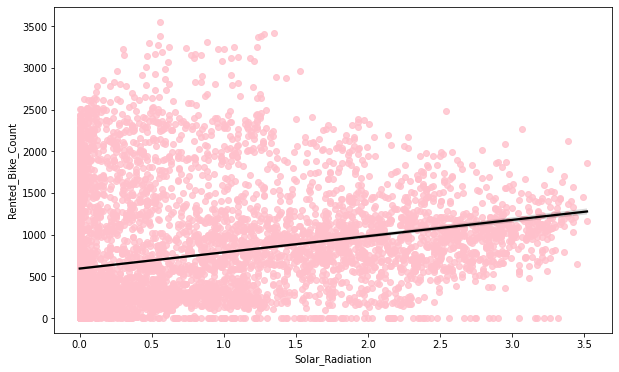

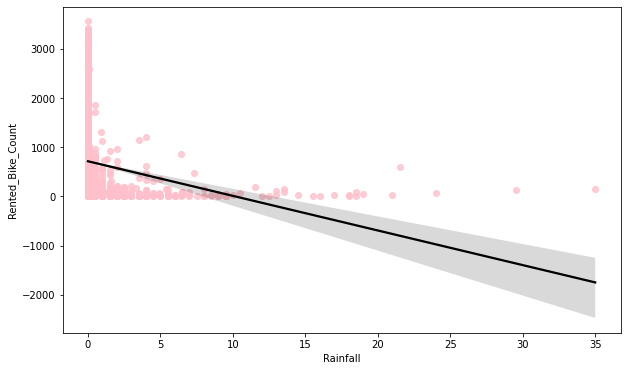

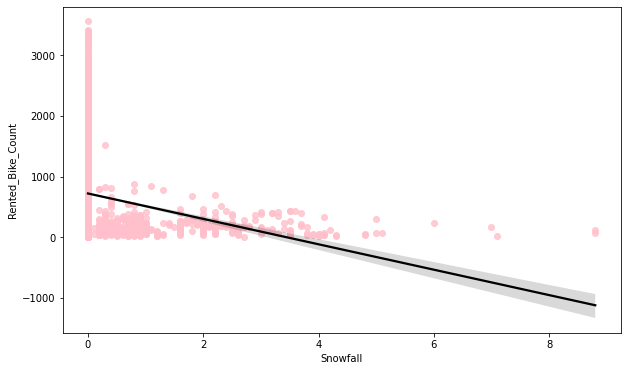

In [51]:
#printing the regression plot for all the numerical features
for col in numerical_features:
  fig,ax=plt.subplots(figsize=(10,6))

  sns.regplot(x=bike_df[col],y=bike_df['Rented_Bike_Count'],scatter_kws={"color": 'pink'}, line_kws={"color": "black"})

*   ### **These are the Regression plot which show the liner relation between numeric and target variable.**

*   ### **There are two type of liner relation present between independent and target variable.**

*   ### **Positively relation**
*   ### **Negatively relation**

## Positively relation
* **which means the target variable(rented bike count) increases with increase of numeric parameter.**
* **In the regression plot of numerical features like 'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation' columns are positively related with the target variaable.**

## Negatively relation
* **which means the target variable(rented bike count) decreases with increase of numeric parameter.**

* **In the regression plot of numerical features like 'Rainfall','Snowfall','Humidity' these features are negatively related with the target variaable.**





# **Normalize Rented_Bike_Count column data**



##1.  The process of transforming the columns in a dataset to the same scale is referred to as normalization.
##2. This improves the performance and training stability of the model.
##3. The data normalization (also referred to as data pre-processing) is a basic element of data mining.
##4. It means transforming the data, namely converting the source data into another format that allows processing data effectively. 
##5. The main purpose of data normalization is to minimize or even exclude duplicated data



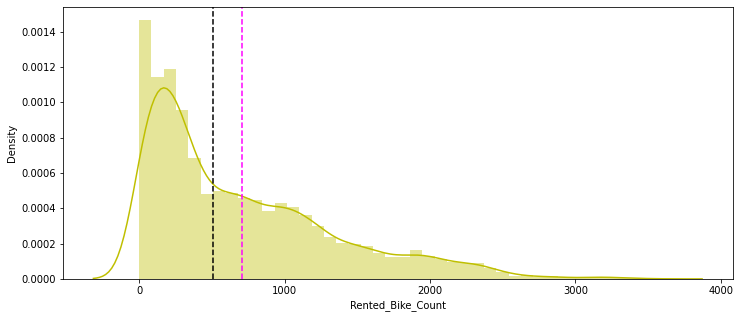

In [52]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(12,5))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
al=sns.distplot(bike_df['Rented_Bike_Count'],hist=True ,color="y")
al.axvline(bike_df['Rented_Bike_Count'].mean(), color='magenta', linestyle='dashed', linewidth=1.5)
al.axvline(bike_df['Rented_Bike_Count'].median(), color='black', linestyle='dashed', linewidth=1.5)
plt.show()



*   The above graph showt that rented bike has moderate right skewness.
* As per the linear regression the distribution of target variable/dependent variable has to be normal.
* we have to perform some operation to make it normal. 




## **Check the outlier by ploting Boxplot**

In [ ]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(20,8))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=bike_df['Rented_Bike_Count'])
plt.show()

In [ ]:
plt.figure(figsize=(20,8))
bike_df.boxplot(vert=0)


* ###    The above boxplot show that outliers in rented bike count column



### After apply square root to rented bike count to improve skewness.

In [ ]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(15,8))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
al=sns.distplot(np.sqrt(bike_df['Rented_Bike_Count']),color="y")
al.axvline(np.sqrt(bike_df['Rented_Bike_Count']).mean(), color='magenta', linestyle='dashed', linewidth=1.5)
al.axvline(np.sqrt(bike_df['Rented_Bike_Count']).median(), color='black', linestyle='dashed', linewidth=1.5)
plt.show()



*   **By applying Square root for the skewed variable in order to make it normal.After applying Squrae root to the skewed rented bike count, here we get nearly similarly to normal distribution.**



### Check the outlier by ploting Boxplot after Square root transformation

In [ ]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(20,8))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(bike_df['Rented_Bike_Count']))
plt.show()

### We can clearly see that mostly no outliers in rented bike count column after Square root transformation.
###After applying Square root to the Rented Bike Count column, we find that there is no outliers present.

# **Correlation of all columns**

In [53]:
bike_df.corr()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
Rented_Bike_Count,1.000000,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Temperature,0.538558,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity,-0.199780,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind_speed,0.121108,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility,0.199280,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew_point_temperature,0.379788,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar_Radiation,0.261837,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall,-0.123074,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall,-0.141804,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


#**Checking of Correlation between variables**

## Checking in OLS Model

### Ordinary least squares (OLS) regression is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable.

In [54]:
#import the module
#assign the 'x','y' value
import statsmodels.api as sm
X = bike_df[[ 'Temperature','Humidity',
       'Wind_speed', 'Visibility','Dew_point_temperature',
       'Solar_Radiation', 'Rainfall', 'Snowfall']]
Y = bike_df['Rented_Bike_Count']
bike_df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Year,Month,Weekdays_or_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,0


In [55]:
#add a constant column
X = sm.add_constant(X)
X

,const,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
0,1.0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,1.0,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,1.0,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,1.0,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,1.0,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,1.0,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,1.0,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,1.0,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,1.0,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


In [56]:
## fit a OLS model 

model= sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented_Bike_Count   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     723.1
Date:                Mon, 26 Dec 2022   Prob (F-statistic):               0.00
Time:                        06:53:06   Log-Likelihood:                -66877.
No. Observations:                8760   AIC:                         1.338e+05
Df Residuals:                    8751   BIC:                         1.338e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   844.6495    106.296      7.946      0.000     636.285    1053.014
Temperature              36.5270      4.169      8.762      0.000      28.355      44.699
Humidity                -10.5077      1.184     -8.872      0.000     -12.829      -8.186
Wind_speed               52.4810      5.661      9.271      0.000      41.385      63.577
Visibility               -0.0097      0.011     -0.886      0.376      -0.031       0.012
Dew_point_temperature    -0.7829      4.402     -0.178      0.859      -9.411       7.846
Solar_Radiation        -118.9772      8.670    -13.724      0.000    -135.971    -101.983
Rainfall                -50.7083      4.932    -10.282      0.000     -60.376     -41.041
Snowfall                 41.0307     12.806      3.204      0.001      15.929      66.133
==============================================================================
Omnibus:                      957.371   Durbin-Watson:                   0.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1591.019
Skew:                           0.769   Prob(JB):                         0.00
Kurtosis:                       4.412   Cond. No.                     3.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1. R sqauare and Adj Square are near to each other. 40% of variance in the Rented Bike count is explained by the model.

2. For F statistic , P value is less than 0.05 for 5% levelof significance.

3. P value of dew point temp and visibility are very high and they are not significant.

4. Omnibus tests the skewness and kurtosis of the residuals. Here the value of Omnibus is high., it shows we have skewness in our data.

5. The condition number is large, 3.11e+04. This might indicate that there are strong multicollinearity or other numerical problems

6. Durbin-Watson tests for autocorrelation of the residuals. Here value is less than 0.5. We can say that there exists a positive auto correlation among the variables.

In [57]:
X.corr()

,const,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,NaN,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity,NaN,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind_speed,NaN,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility,NaN,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew_point_temperature,NaN,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar_Radiation,NaN,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall,NaN,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall,NaN,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


* **Form the OLS model we can find that theh 'Temperature' and Dew_point_temperature' are highly correlated to each other.**
* **So we need to drop one of them. For droping a column we need to check the (P>|t|) value from the above table and we can see that 'Dew-point-temprature' value is higher so we need to drop that 'Dew-point-temprature' column.**
* **This can be seen on the heat-map next.**


# **Heatmap**



###     **Heatmap is a matrix representation between different variable, which help to show correlation between variables by using graphical representation.**





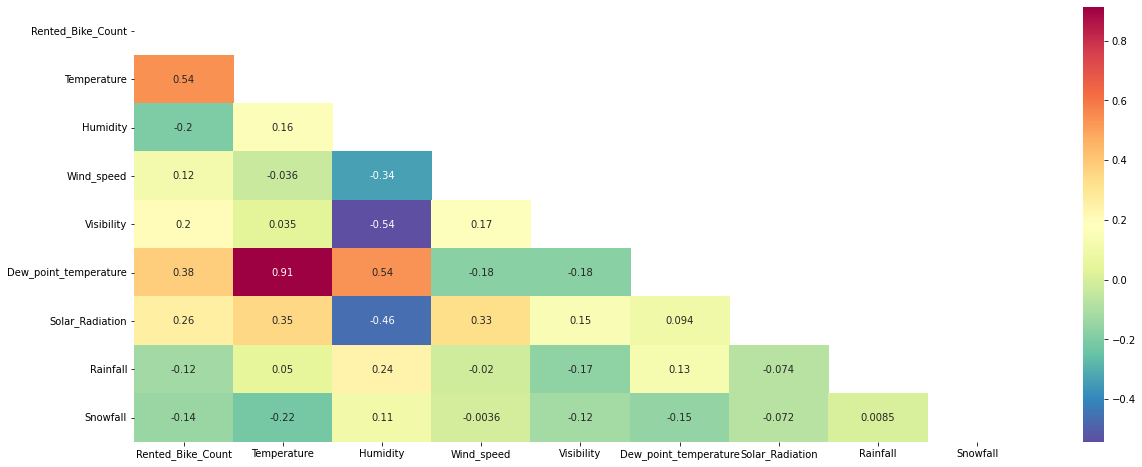

In [58]:
# plot the Correlation matrix
plt.figure(figsize=(20,8))
correlation=bike_df.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap((correlation),mask=mask, annot=True,cmap='Spectral_r')

### **We can observe on the heatmap that on the target variable line the most positivly correlated varibales to the rent are:**

* ###   Temperature
* ###   Dew point temperature
* ###   Solar radiation

###  **And most negatively correlated variables are:**
* ###  Humidity
* ###  Rainfall




* ## From the above graph we can see that relation between columns 'Temperature' and 'Dew point temperature' i.e 0.91 so we if we drop this column than it will not affect  the outcome of our anallysis.
* ## We can drop the column 'Dew point temperature'.



In [59]:
# drop  the column 'Dew point temperature' from dataset

bike_df=bike_df.drop(['Dew_point_temperature'],axis=1)
bike_df=bike_df.drop(['Year'],axis=1)

In [60]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Rented_Bike_Count    8760 non-null   int64   
 1   Hour                 8760 non-null   category
 2   Temperature          8760 non-null   float64 
 3   Humidity             8760 non-null   int64   
 4   Wind_speed           8760 non-null   float64 
 5   Visibility           8760 non-null   int64   
 6   Solar_Radiation      8760 non-null   float64 
 7   Rainfall             8760 non-null   float64 
 8   Snowfall             8760 non-null   float64 
 9   Seasons              8760 non-null   object  
 10  Holiday              8760 non-null   object  
 11  Functioning_Day      8760 non-null   object  
 12  Month                8760 non-null   category
 13  Weekdays_or_weekend  8760 non-null   category
dtypes: category(3), float64(5), int64(3), object(3)
memory usage: 779.8+ KB


# Create the dummy variables

## A dataset may contain various type of values, sometimes it consists of categorical values. So, in-order to use those categorical value for programming efficiently we create dummy variables.

In [61]:
#Assign catagoriacla features to a variable
categorical_features=list(bike_df.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'Month',
       'Weekdays_or_weekend'],
      dtype='object')

## The categories must be converted into numbers.

In [62]:
#creat a copy
bike_df_copy = bike_df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    bike_df_copy = one_hot_encoding(bike_df_copy, col)
bike_df_copy.head()  

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Weekdays_or_weekend_1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


#**Model Training**

##**Train Test split for regression**

##**What is Train Test split?**
##The train-test split is used to estimate the performance of machine learning algorithms that are applicable for prediction-based Algorithms/Applications.Before fitting any model it a general rule that we have to split the dataset into a training and testing set. This dataset split in a proportions of the data go into the training model and some propotion will go gor evaluation how our model perform on any unseen data.


##Generally the proportion may vary from 70:30,80:20,75:25 depending on the person.Mostyly we perfer 80:20 ratio for the training and testing respectivly.

In [63]:
#Assign the value in X for independednt variable and Y dependent variable
X = bike_df_copy.drop(columns=['Rented_Bike_Count'], axis=1)
X.head()

,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,Hour_3,...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Weekdays_or_weekend_1
0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
#Assign the value in Y fop dependent variable/target value
y = np.sqrt(bike_df_copy['Rented_Bike_Count'])
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

In [65]:
#Creat test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print (X_train.shape)
print (X_test.shape)

(7008, 47)
(1752, 47)


In [66]:
bike_df_copy.describe()


,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Weekdays_or_weekend_1
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,...,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,12.882922,58.226256,1.724909,1436.825799,0.569111,0.148687,0.075068,0.041667,0.041667,...,0.082192,0.084932,0.082192,0.084932,0.084932,0.082192,0.084932,0.082192,0.084932,0.290411
std,644.997468,11.944825,20.362413,1.036300,608.298712,0.868746,1.128193,0.436746,0.199838,0.199838,...,0.274672,0.278796,0.274672,0.278796,0.278796,0.274672,0.278796,0.274672,0.278796,0.453978
min,0.000000,-17.800000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,191.000000,3.500000,42.000000,0.900000,940.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,504.500000,13.700000,57.000000,1.500000,1698.000000,0.010000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1065.250000,22.500000,74.000000,2.300000,2000.000000,0.930000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,3556.000000,39.400000,98.000000,7.400000,2000.000000,3.520000,35.000000,8.800000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
bike_df_copy.describe().columns

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
       'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20',
       'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_No Holiday', 'Functioning_Day_Yes',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'Weekdays_or_weekend_1'],
      dtype='object')

# **LINEAR REGRESSION**

Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

In [68]:
#import the packages and do LinearRegression
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [69]:
#Checking the score
reg.score(X_train, y_train)

0.7577721255927354

In [70]:
#check the coefficeint
reg.coef_

array([ 4.69159669e-01, -1.33778588e-01, -1.54679697e-01,  6.26366033e-04,
        1.12042152e+00, -1.52421625e+00,  2.79799757e-02, -1.86940267e+00,
       -4.90148817e+00, -7.27410013e+00, -9.53957339e+00, -9.17923567e+00,
       -4.14235276e+00,  2.07149688e+00,  7.30417581e+00,  1.03467972e+00,
       -3.38140659e+00, -3.74740554e+00, -2.97214965e+00, -3.16836186e+00,
       -3.20026704e+00, -1.99897412e+00,  1.04326353e-01,  3.90346150e+00,
        1.04589523e+01,  6.92903557e+00,  6.21924936e+00,  6.50831026e+00,
        5.14684736e+00,  1.59176403e+00, -2.72431109e+00, -3.28365312e+00,
       -6.67834286e+00,  2.87701367e+00,  2.79331015e+01, -7.71559653e-01,
        3.08433567e-01,  4.31055133e-01,  1.49402368e+00,  4.25263499e+00,
       -1.34411688e-01, -7.22487949e-01,  2.59847744e-01,  2.19941265e+00,
        1.01562148e+00,  1.13560915e+00, -7.16850511e-01])

## Training dataset summary

In [71]:
#get the X_train and X-test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [72]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 37.38378425104445
RMSE : 6.1142280175868855
MAE : 4.643806855400769
R2 : 0.7577721255927354
Adjusted R2 : 0.751090957695352


**Looks like our R2 score value is 0.75 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

## Store the model in train data 

In [73]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

## Testing dataset summary

In [74]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_test), (y_pred_test))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_test, y_pred_test)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_lr )


MSE : 37.17135560655831
RMSE : 6.096831603920048
MAE : 4.687333291584496
R2 : 0.7639707980063422
Adjusted R2 : 0.7574606028809302


## Store the model in testing data 

In [75]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),3)
       }
test_df=pd.DataFrame(dict2,index=[1])

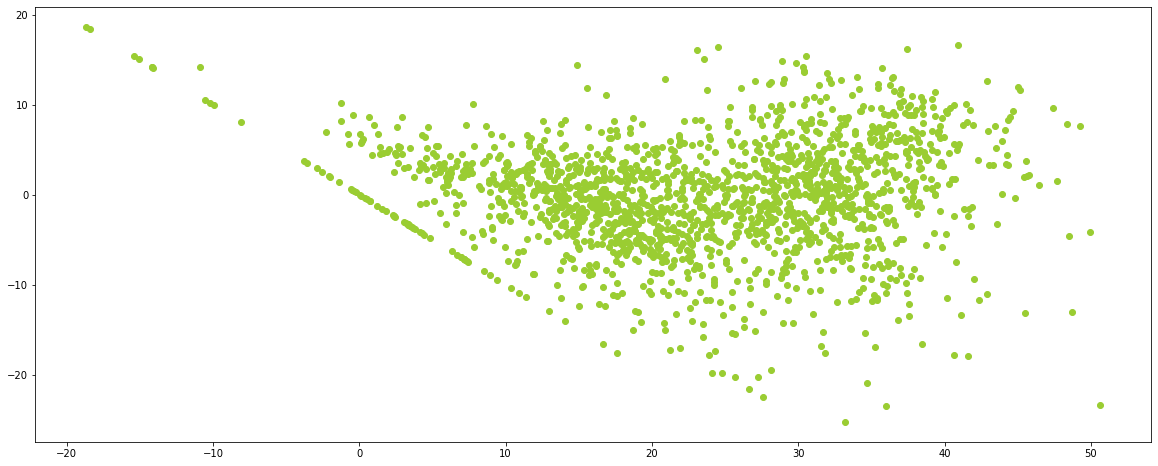

In [76]:
#Heteroscadacity
plt.figure(figsize=(20,8))
plt.scatter((y_pred_test),(y_test)-(y_pred_test),color='yellowgreen')

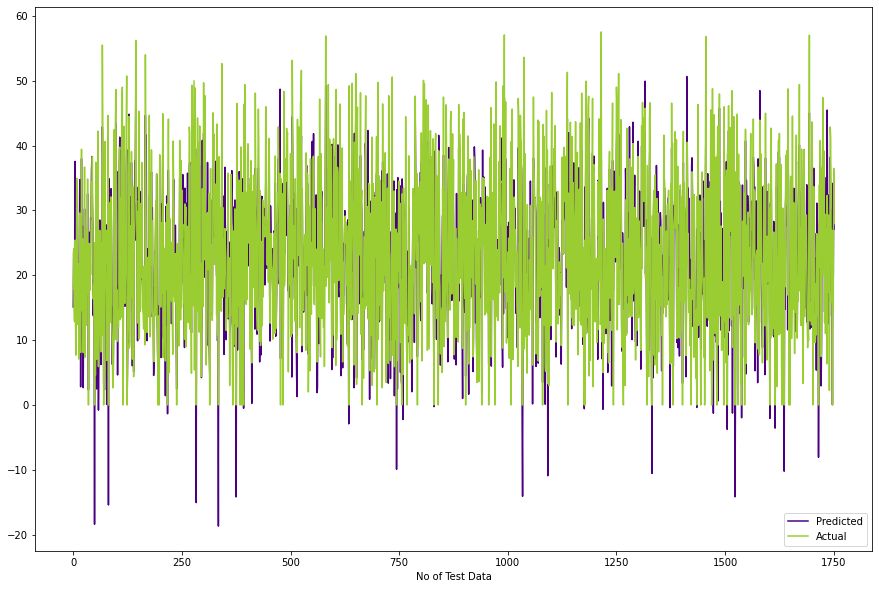

In [77]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test,color='indigo')
plt.plot(np.array(y_test),color='yellowgreen')
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

#**LASSO REGRESSION** 

 
*   ## **Lasso regression is a regularization technique. It is used over regression methods for a more accurate prediction. This model uses shrinkage.**
*  ## **Shrinkage is where data values are shrunk towards a central point as the mean.** 
*  ## **Lasso regression technique also called as '*L1 regularization technique*'.**



In [78]:
##import the packages and do Lasso Regression
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))


0.38369573583917327 0.4048286433798308


In [79]:
#get the X_train and X-test value
y_pred_train_lasso=reg.predict(X_train)
print(y_pred_train_lasso)
y_pred_test_lasso=reg.predict(X_test)
print(y_pred_test_lasso)

[15.57208411 41.98596618 28.47900791 ... 33.25622183 22.59236205
 22.94238643]
[15.0963269  23.49734135 20.47389913 ... 19.86294365 33.42283726
 27.10104932]


## Training dataset summary for lasso 

In [80]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)

#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)

from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 37.38378425104445
RMSE : 6.1142280175868855
MAE : 4.643806855400769
R2 : 0.7577721255927354
Adjusted R2 : 0.751090957695352


**Looks like our R2 score value is 0.75 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [81]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),3)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [82]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 37.17135560655831
RMSE : 6.096831603920048
MAE : 4.687333291584496
R2 : 0.7639707980063422
Adjusted R2 : 0.7574606028809302


**Looks like our R2 score value is 0.76 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [83]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

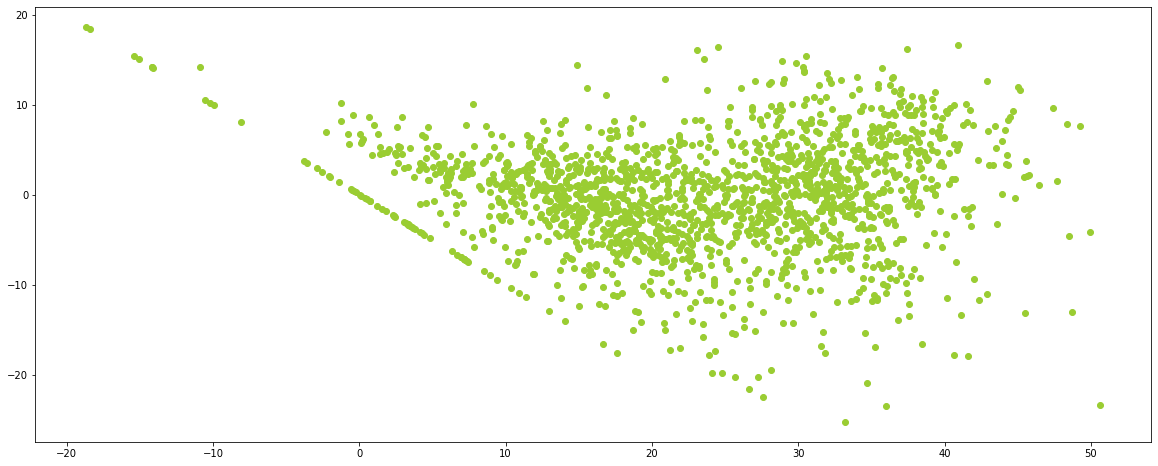

In [84]:
#Heteroscadacity
plt.figure(figsize=(20,8))
plt.scatter((y_pred_test_lasso),(y_test)-(y_pred_test_lasso),color='yellowgreen')

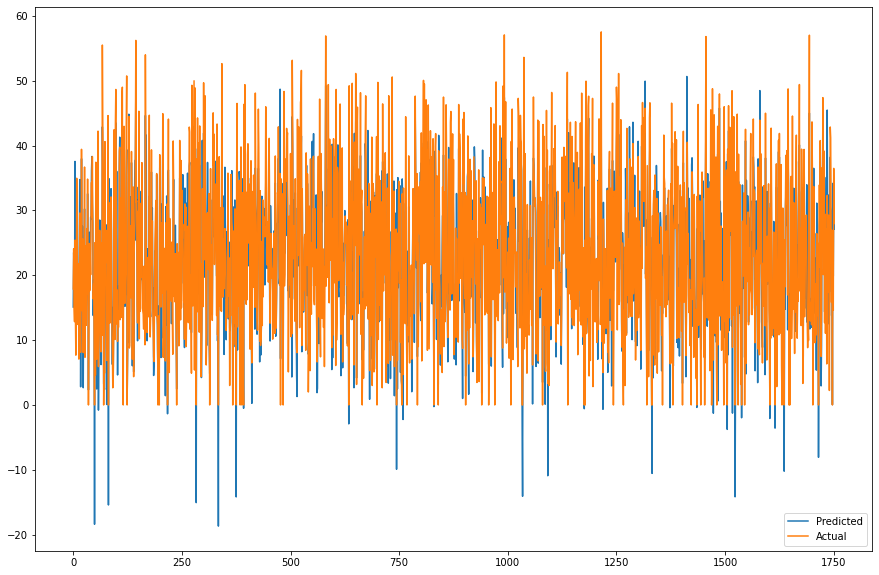

In [85]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **RIDGE REGRESSION**

In [86]:
#import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)

In [87]:
#FIT THE MODEL
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [88]:
#check the score
ridge.score(X_train, y_train)

0.7577720532742077

In [89]:
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
print(y_pred_train_ridge)
y_pred_test_ridge=ridge.predict(X_test)
print(y_pred_test_ridge)

[15.57188549 41.98205935 28.48288759 ... 33.25402259 22.59061812
 22.93890883]
[15.09865404 23.49568135 20.47527891 ... 19.86046971 33.41966147
 27.09792255]


[15.39704473 10.4935988  31.64055663 ... 33.18263031 22.58367557
 22.88164981]
[15.13693407 23.62233345 20.42378488 ... 38.79661287 33.01630156
 31.06790916]

In [90]:

#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 37.383795412188654
RMSE : 6.114228930305821
MAE : 4.64390544661438
R2 : 0.7577720532742077
Adjusted R2 : 0.751090883382123


Value of R2 os os 0.75 that means it capture the data variance.

In [91]:
# storing the test set metrics value in a dataframe for comparison
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [92]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 37.17258595121565
RMSE : 6.096932503416423
MAE : 4.687557965189701
R2 : 0.7639629856125537
Adjusted R2 : 0.7574525750044492


Value of R2 os os 0.75 that means it capture the data variance.

In [93]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
test_df=test_df.append(dict2,ignore_index=True)

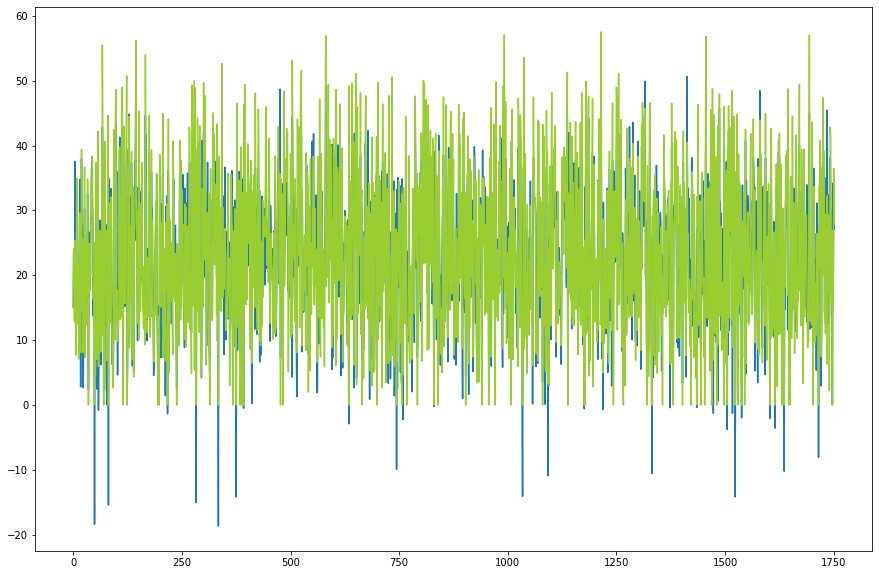

In [94]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)),color='yellowgreen')
plt.show()

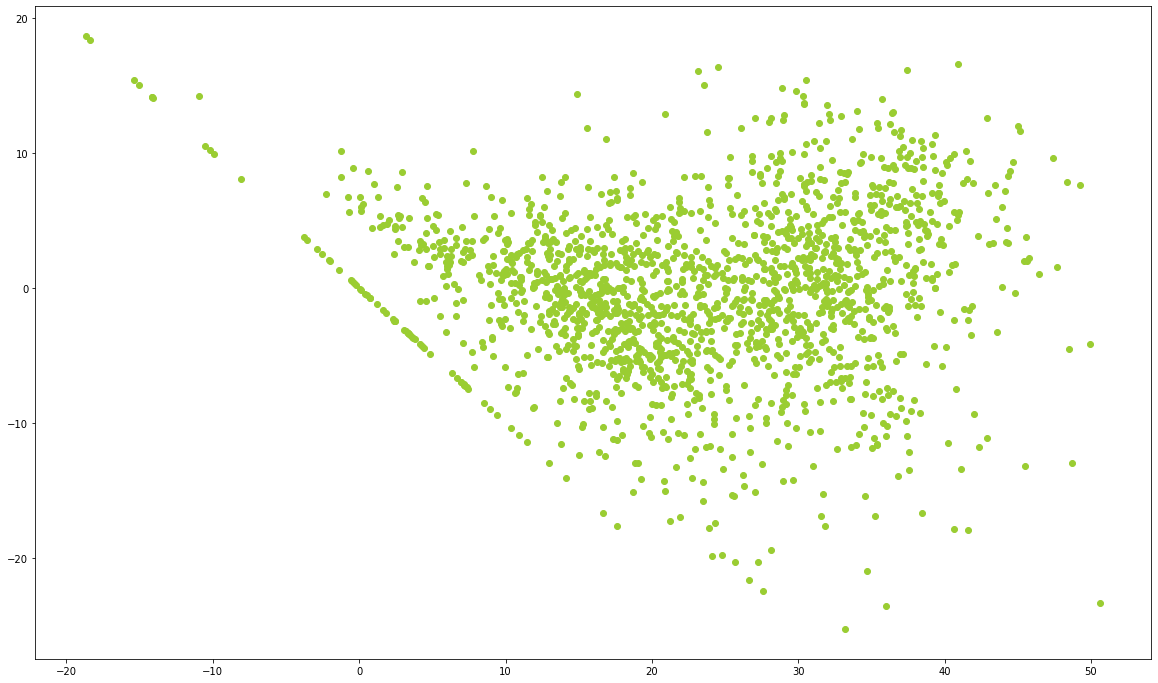

In [95]:
# Heteroscadacity
plt.figure(figsize=(20,12))
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge),color='yellowgreen')

# **ELASTIC NET REGRESSION**

In [96]:
#import the packages
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [97]:



#FIT THE MODEL
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [98]:
#check the score
elasticnet.score(X_train, y_train)

0.6165079784978632

In [99]:
#get the X_train and X-test value
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

In [100]:





#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_en)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 59.18552119120946
RMSE : 7.693212670348419
MAE : 5.89976127080202
R2 : 0.6165079784978632
Adjusted R2 : 0.6059304403461023


**Looks like our R2 score value is 0.61 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [101]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Elastic net regression ',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),3)}
training_df=training_df.append(dict1,ignore_index=True)

In [102]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error(y_test, y_pred_test_en)
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_test, y_pred_test_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score((y_test), (y_pred_test_en))
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 61.89540398980882
RMSE : 7.867363217101955
MAE : 6.014283295670914
R2 : 0.606979014555711
Adjusted R2 : 0.5961386469994425


**Looks like our R2 score value is 0.60 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [103]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Elastic net regression Test',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),3)}
test_df=test_df.append(dict2,ignore_index=True)

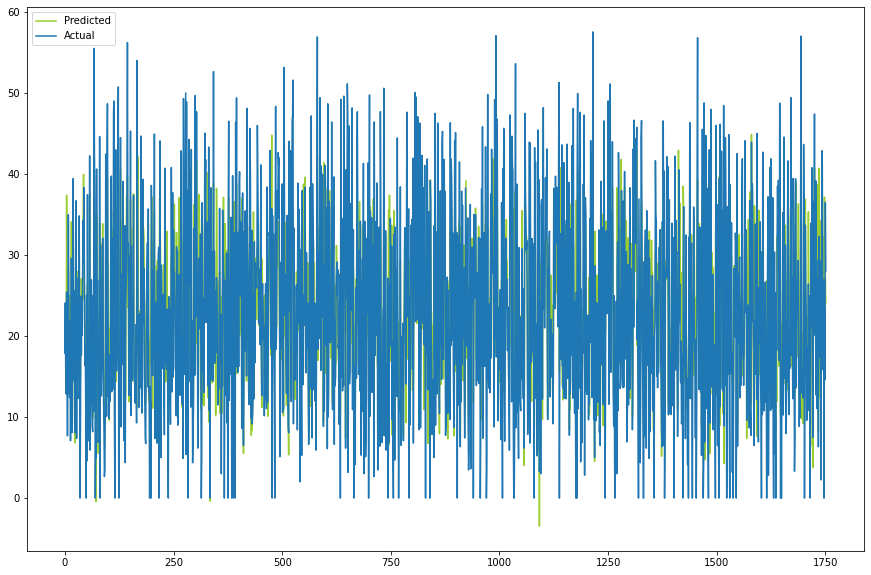

In [104]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_en),color='yellowgreen')
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

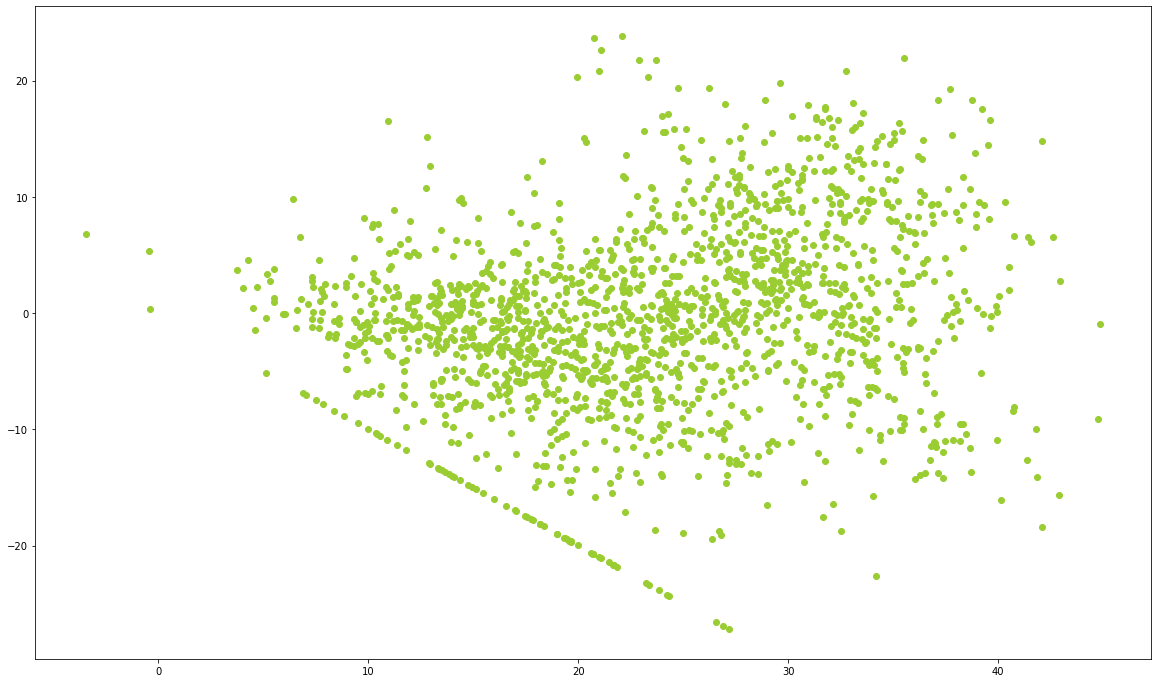

In [105]:
# Heteroscadacity
plt.figure(figsize=(20,12))
plt.scatter((y_pred_test_en),(y_test)-(y_pred_test_en),color='yellowgreen')

# **DECISION TREE**



In [106]:
#import the packages
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [107]:
#get the X_train and X-test value
y_pred_train_d = decision_regressor.predict(X_train)
y_pred_test_d = decision_regressor.predict(X_test)

In [108]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(X_train,y_train))

#calculate MSE
MSE_d= mean_squared_error(y_train, y_pred_train_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_train, y_pred_train_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score(y_train, y_pred_train_d)
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.6939061423252837
MSE : 47.240420880060036
RMSE : 6.873166728667364
MAE : 5.075029530027018
R2 : 0.6939061423252837
Adjusted R2 : 0.6854634126828472


**Looks like our R2 score value is 0.69 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [109]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [110]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_d= mean_squared_error(y_test, y_pred_test_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score((y_test), (y_pred_test_d))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 50.256018627257674
RMSE : 7.089147947903025
MAE : 5.197272897596593
R2 : 0.6808863228577764
Adjusted R2 : 0.6720844784765061


**The R2_score for the test set is 0.66. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**

In [111]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

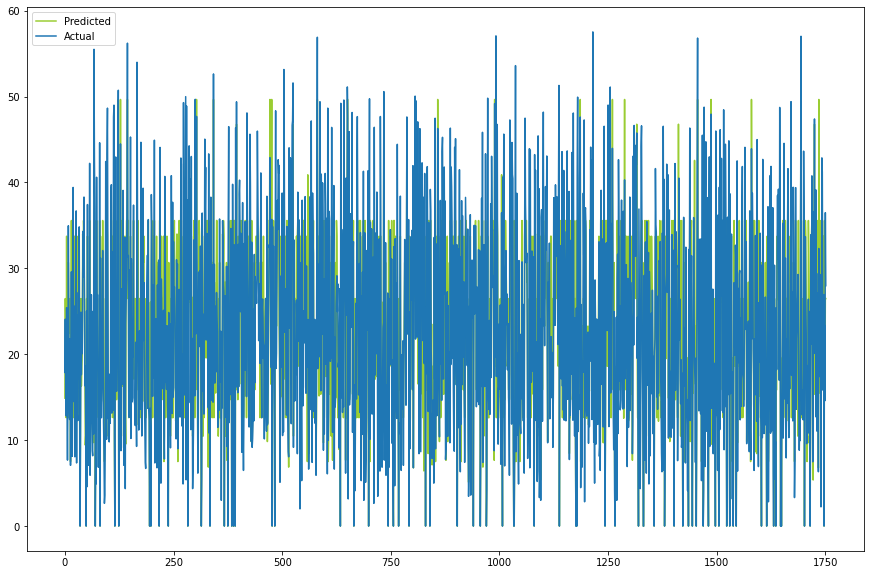

In [112]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((np.array(y_pred_test_d)),color='yellowgreen')
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

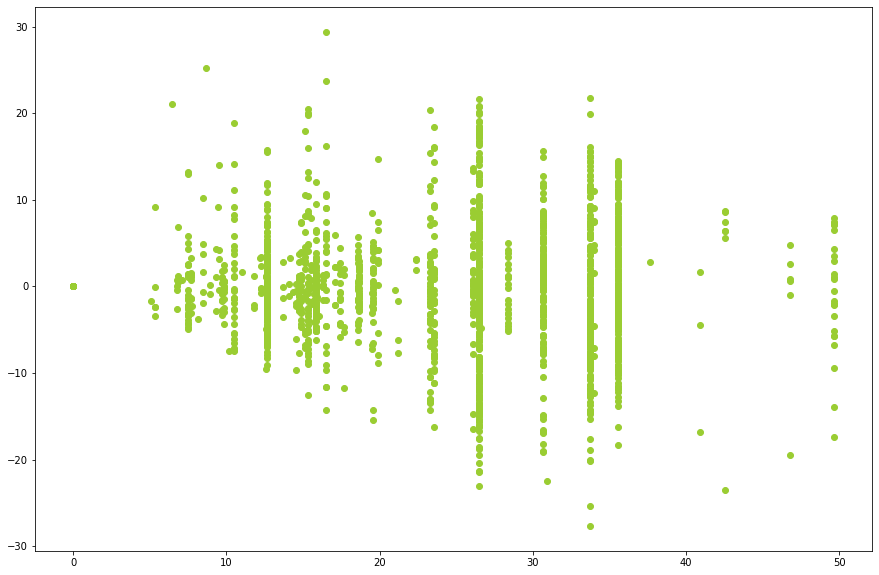

In [113]:
# Heteroscadacity
plt.figure(figsize=(15,10))
plt.scatter((y_pred_test_d),(y_test)-(y_pred_test_d),color='yellowgreen')

# **RANDOM FOREST**

In [114]:
#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [115]:
# Making predictions on train and test data

y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)

In [116]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

#calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9868717610823527
MSE : 2.0261221071044906
RMSE : 1.423419160719881
MAE : 0.9376245130544958
R2 : 0.9868717610823527
Adjusted R2 : 0.9865096559009388


**Look like our R2 score value is 0.98 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons**

In [117]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [118]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 16.07619271812797
RMSE : 4.009512778147486
MAE : 2.578873997278438
R2 : 0.8979200280313014
Adjusted R2 : 0.8951044419500052


**Looks like R2_score for the test set is 0.89. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**

In [119]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(dict2,ignore_index=True)

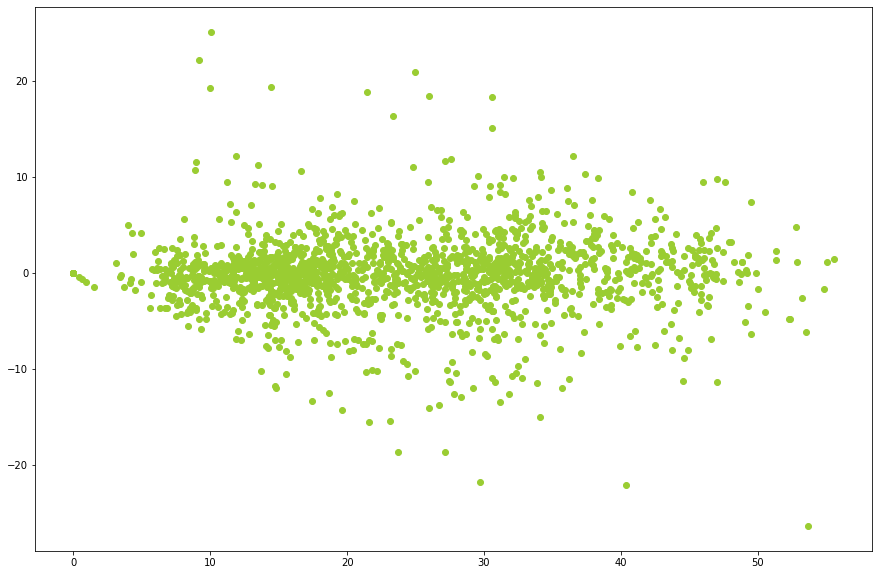

In [120]:
# Heteroscadacity
plt.figure(figsize=(15,10))
plt.scatter((y_pred_test_r),(y_test)-(y_pred_test_r),color='yellowgreen')

# **Understanding the importance of the features**

In [121]:
# importance of the features
rf_model.feature_importances_

array([3.21243396e-01, 1.56361722e-01, 1.37882525e-02, 1.45200504e-02,
       2.91484512e-02, 3.39700284e-02, 1.21793978e-03, 4.80519530e-03,
       1.36352635e-02, 2.05800481e-02, 3.17016450e-02, 2.76293251e-02,
       9.24677535e-03, 3.77635548e-03, 1.32181615e-02, 8.65921162e-04,
       2.21344487e-03, 1.01576119e-03, 2.17814652e-04, 1.83548453e-04,
       2.92141116e-04, 1.17907344e-03, 3.34308873e-03, 1.05106760e-02,
       3.20972970e-02, 1.61131373e-02, 1.14522905e-02, 1.14718605e-02,
       8.19925958e-03, 3.39361425e-03, 6.01459839e-03, 1.29497715e-03,
       1.17200046e-02, 3.23835511e-03, 1.51341732e-01, 1.17586637e-03,
       2.95890052e-03, 1.41980121e-03, 1.59408987e-03, 1.62760261e-03,
       1.13826817e-03, 1.78915838e-03, 1.96766122e-03, 1.80610145e-03,
       3.18296023e-03, 7.30407908e-04, 9.60797637e-03])

In [122]:
importances = rf_model.feature_importances_
importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [123]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [124]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Temperature,0.32
1,Humidity,0.16
34,Functioning_Day_Yes,0.15
4,Solar_Radiation,0.03
5,Rainfall,0.03
10,Hour_4,0.03
11,Hour_5,0.03
24,Hour_18,0.03
9,Hour_3,0.02
25,Hour_19,0.02


In [125]:
#FIT THE MODEL
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [126]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

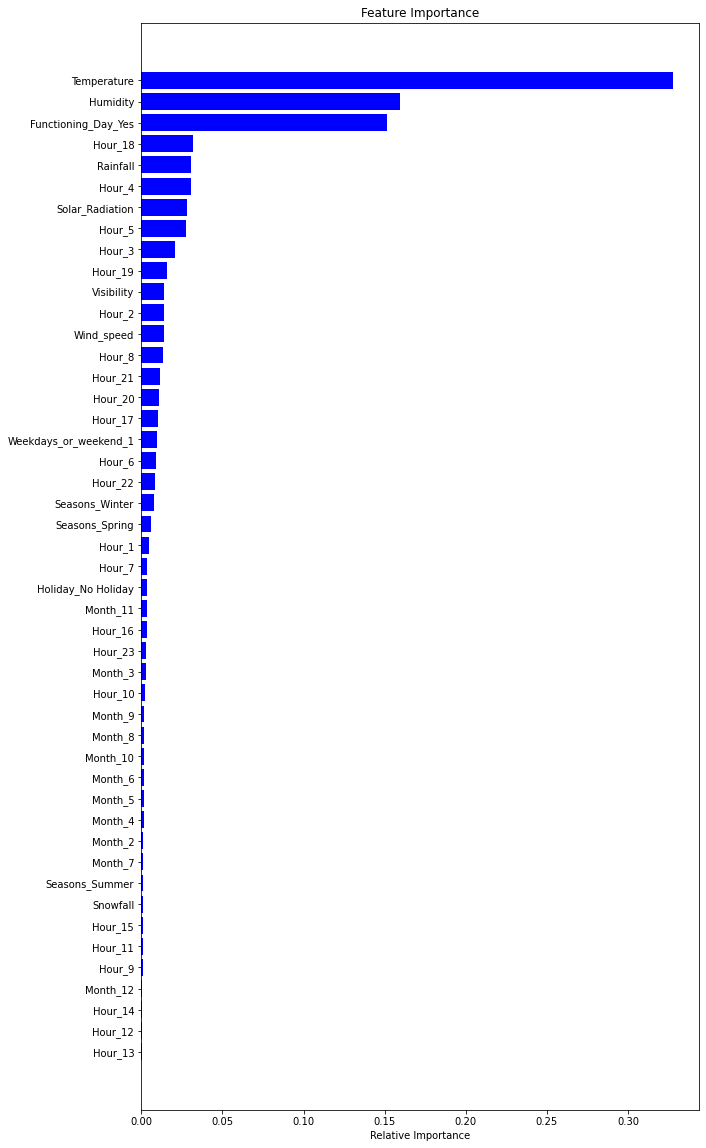

In [127]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show( )

# **GRADIENT BOOSTING**

In [128]:
#import the packages
from sklearn.ensemble import GradientBoostingRegressor
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [129]:
# Making predictions on train and test data
y_pred_train_g = gb_model.predict(X_train)
y_pred_test_g = gb_model.predict(X_test)


In [130]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_model.score(X_train,y_train))
#calculate MSE
MSE_gb= mean_squared_error(y_train, y_pred_train_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_train, y_pred_train_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score(y_train, y_pred_train_g)
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.863811667212725
MSE : 21.018370668063156
RMSE : 4.5845796610009035
MAE : 3.458958093204522
R2 : 0.863811667212725
Adjusted R2 : 0.8600552988788036


**Looks like our R2 score value is 0.87 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [131]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
training_df=training_df.append(dict1,ignore_index=True)

In [132]:

#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_gb= mean_squared_error(y_test, y_pred_test_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_test, y_pred_test_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score((y_test), (y_pred_test_g))
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 24.2112662198816
RMSE : 4.920494509689204
MAE : 3.6750848068057334
R2 : 0.8462642604262081
Adjusted R2 : 0.8420238967173065


**The R2_score for the test set is 0.84. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**

In [133]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

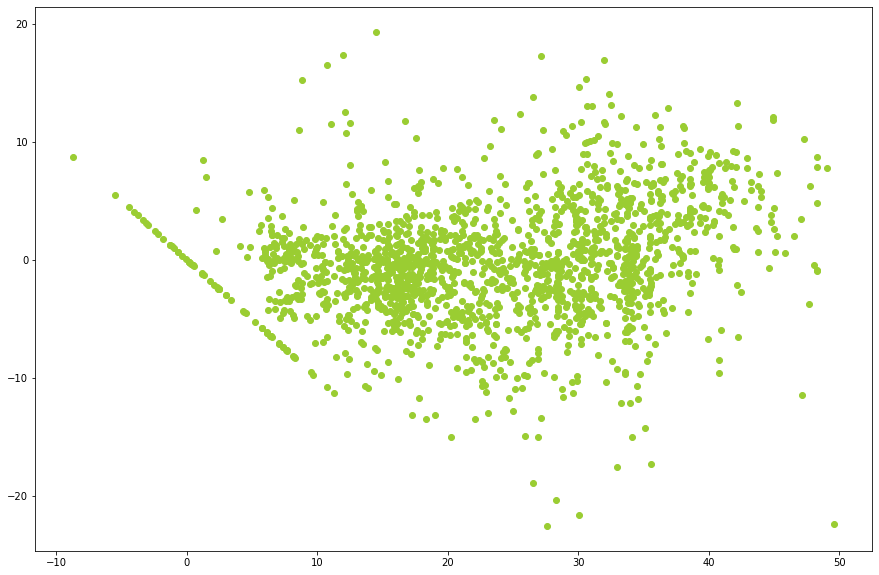

In [134]:
### Heteroscadacity
plt.figure(figsize=(15,10))
plt.scatter((y_pred_test_g),(y_test)-(y_pred_test_g),color='yellowgreen')

In [135]:
gb_model.feature_importances_

array([3.22871183e-01, 1.33016044e-01, 5.10147151e-04, 1.50866719e-03,
       4.64065318e-02, 6.39739486e-02, 1.17490602e-04, 5.94165723e-04,
       6.17050409e-03, 1.36307252e-02, 2.86329744e-02, 2.22568489e-02,
       5.94644855e-03, 5.92491845e-04, 9.25410253e-03, 0.00000000e+00,
       3.00703837e-03, 1.62207199e-03, 0.00000000e+00, 0.00000000e+00,
       5.63612861e-05, 0.00000000e+00, 4.55106411e-04, 7.47470060e-03,
       3.10734834e-02, 1.73914714e-02, 1.19639717e-02, 1.66243889e-02,
       1.29321766e-02, 3.64114882e-04, 1.14064083e-03, 0.00000000e+00,
       4.03915580e-02, 2.61657476e-03, 1.80686980e-01, 0.00000000e+00,
       7.51742011e-04, 0.00000000e+00, 0.00000000e+00, 1.44061200e-03,
       9.14433292e-05, 2.02463480e-04, 0.00000000e+00, 3.20508847e-03,
       3.52050225e-03, 1.06611909e-04, 7.39862366e-03])

In [136]:
importances = gb_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [137]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [138]:
importance_df.head()

,Feature,Feature Importance
0,Temperature,0.32
1,Humidity,0.13
2,Wind_speed,0.00
3,Visibility,0.00
4,Solar_Radiation,0.05


In [139]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Temperature,0.32
34,Functioning_Day_Yes,0.18
1,Humidity,0.13
5,Rainfall,0.06
4,Solar_Radiation,0.05
32,Seasons_Winter,0.04
10,Hour_4,0.03
24,Hour_18,0.03
27,Hour_21,0.02
25,Hour_19,0.02


In [140]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [141]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

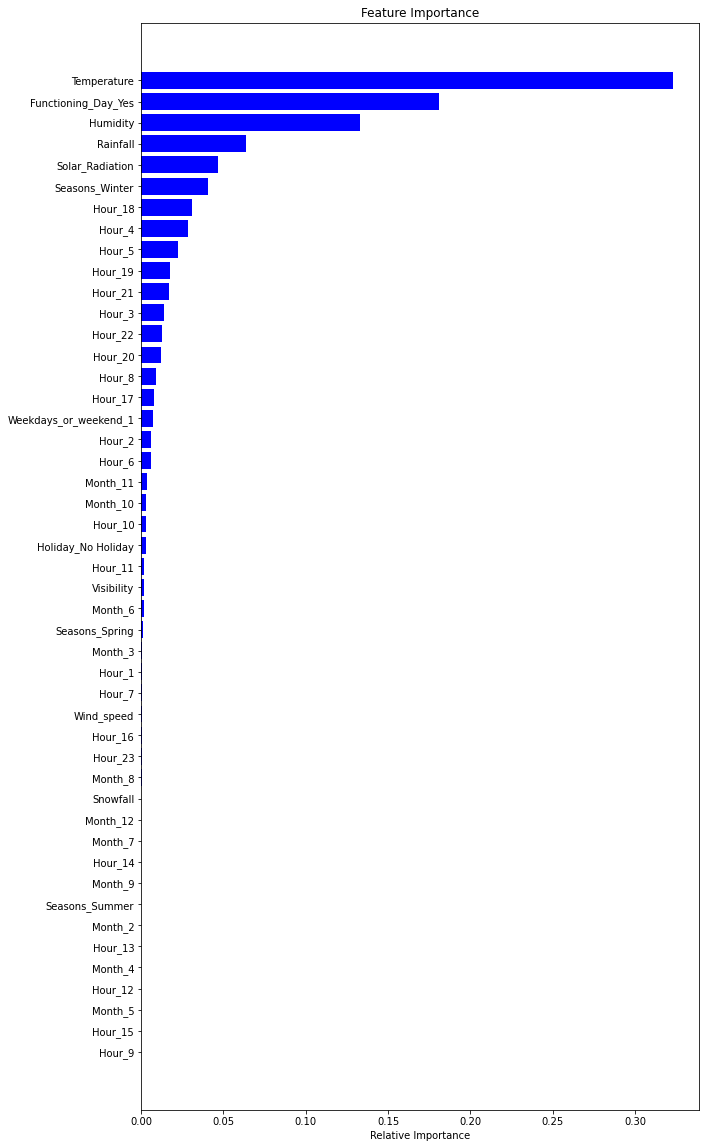

In [142]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#**Hyperparameter tuning** 

## Hyperparameter tuning (or hyperparameter optimization) is the process of determining the right combination of hyperparameters that maximizes the model performance. It works by running multiple trials in a single training process. Each trial is a complete execution of your training application with values for your chosen hyperparameters, set within the limits you specify. This process once finished will give you the set of hyperparameter values that are best suited for the model to give optimal results.  


##1.   There are two type way to tuning hyperparameter
* ##   GridSearchCV
* ##   RandomizedSearchCV 




## **GridSearchCV**

* ## In GridSearchCV approach, the machine learning model is evaluated for a range of hyperparameter values. This approach is called GridSearchCV, because it searches for the best set of hyperparameters from a grid of hyperparameters values.

## **RandomizedSearchCV**

* ## RandomizedSearchCV solves the drawbacks of GridSearchCV, as it goes through only a fixed number of hyperparameter settings. It moves within the grid in a random fashion to find the best set of hyperparameters. This approach reduces unnecessary computation.

##**Gradient Boosting Regressor with GridSearchCV**

### **Provide the range of values for chosen hyperparameters**

In [143]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [144]:
param_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

In [145]:
from sklearn.model_selection import GridSearchCV
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

gb_grid.fit(X_train,y_train)

[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=80; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=100; total time=   1.1s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=100; total time=   1.1s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=100; total time=   1.1s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=100; total time=   1.1s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=50, n_estimators=100; total time=   1.2s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=100, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=100, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=100, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=50, min_samples_split=100, n_estimators=50; 

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [146]:
gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=8, min_samples_leaf=40,
                          min_samples_split=50)

In [147]:
gb_optimal_model = gb_grid.best_estimator_

In [148]:
gb_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [149]:
# Making predictions on train and test data

y_pred_train_g_g = gb_optimal_model.predict(X_train)
y_pred_g_g= gb_optimal_model.predict(X_test)

In [150]:

from sklearn.metrics import mean_squared_error
print("Model Score:",gb_optimal_model.score(X_train,y_train))
MSE_gbh= mean_squared_error(y_train, y_pred_train_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_train, y_pred_train_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score(y_train, y_pred_train_g_g)
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.9379764538609234
MSE : 9.5722875537003
RMSE : 3.093911368106769
MAE : 2.1603270883233914
R2 : 0.9379764538609234
Adjusted R2 : 0.9362657105108433


In [151]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [152]:
from sklearn.metrics import mean_squared_error
MSE_gbh= mean_squared_error(y_test, y_pred_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_test, y_pred_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score((y_test), (y_pred_g_g))
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_test, y_pred_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_g_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 14.869400628225149
RMSE : 3.856086180082747
MAE : 2.6457192644148577
R2 : 0.905582868659631
Adjusted R2 : 0.9029786402717217


In [153]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

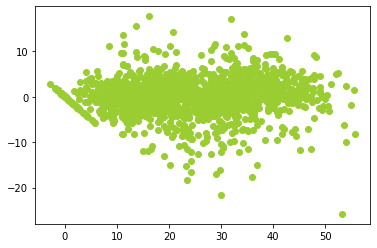

In [154]:
### Heteroscadacity
plt.Figure(figsize=(15,10))
plt.scatter((y_pred_g_g),(y_test)-(y_pred_g_g),color='yellowgreen')

In [155]:
gb_optimal_model.feature_importances_

array([3.27048465e-01, 1.49007526e-01, 5.28295661e-03, 6.45965378e-03,
       3.18266249e-02, 4.64583315e-02, 8.83920285e-04, 1.53358787e-03,
       1.11421696e-02, 1.98574580e-02, 3.21582522e-02, 2.86341293e-02,
       8.45360166e-03, 2.56738633e-03, 1.05782070e-02, 5.48451825e-04,
       3.66609704e-03, 1.95164279e-03, 6.54115395e-05, 7.15358540e-05,
       1.28228145e-04, 2.63914000e-04, 1.53803614e-03, 8.81277469e-03,
       3.31452891e-02, 1.82105813e-02, 1.27047718e-02, 1.74641448e-02,
       8.96244258e-03, 1.66636505e-03, 7.32588691e-03, 6.29926051e-04,
       1.82048147e-02, 2.21452771e-03, 1.60631919e-01, 1.27167335e-04,
       5.51858935e-04, 1.37005971e-04, 6.43049746e-04, 1.64470008e-03,
       3.31382089e-04, 7.01737730e-04, 8.18067031e-04, 1.90889662e-03,
       1.57348275e-03, 2.80099069e-04, 1.11835223e-02])

In [156]:
importances = gb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [157]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [158]:
importance_df.head()

,Feature,Feature Importance
0,Temperature,0.33
1,Humidity,0.15
2,Wind_speed,0.01
3,Visibility,0.01
4,Solar_Radiation,0.03


In [159]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Temperature,0.33
34,Functioning_Day_Yes,0.16
1,Humidity,0.15
5,Rainfall,0.05
4,Solar_Radiation,0.03
10,Hour_4,0.03
11,Hour_5,0.03
24,Hour_18,0.03
32,Seasons_Winter,0.02
27,Hour_21,0.02


In [160]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [161]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

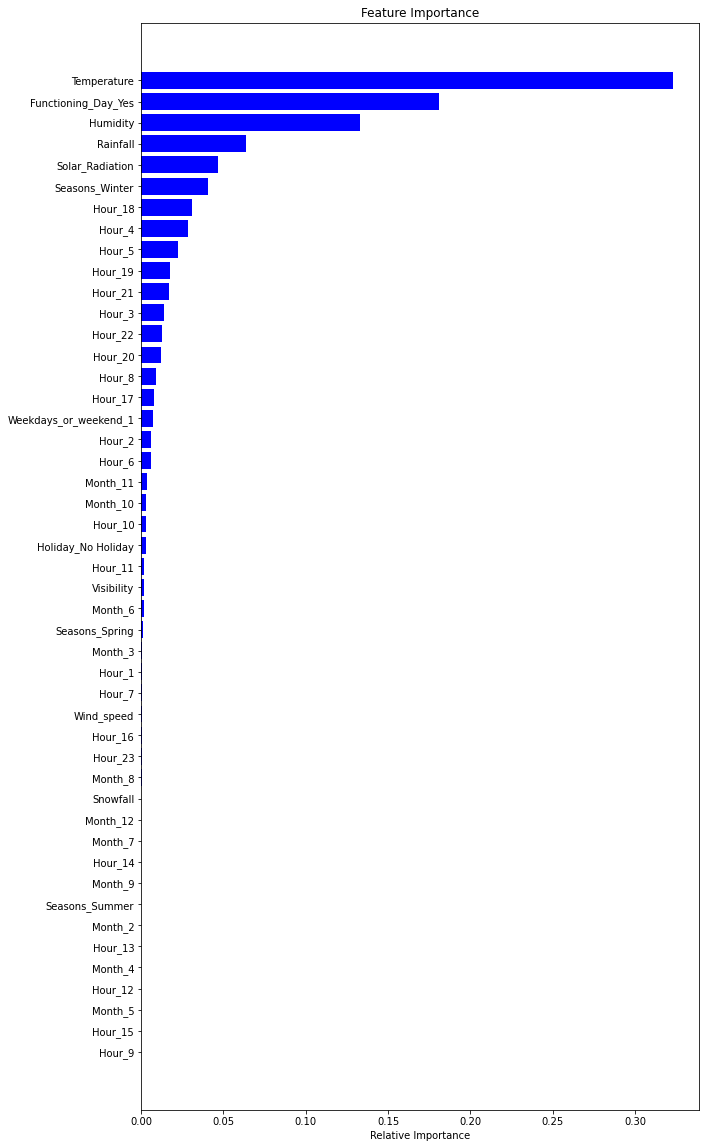

In [162]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#**CONCLUSION**

In [165]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model    MAE     MSE   RMSE  \
Training set 0               Linear regression   4.644  37.384  6.114   
             1                Lasso regression   4.644  37.384  6.114   
             2                Ridge regression   4.644  37.384  6.114   
             3          Elastic net regression   5.900  59.186  7.693   
             4        Dicision tree regression   5.075  47.240  6.873   
             5        Random forest regression   0.938   2.026  1.423   
             6    Gradient boosting regression   3.459  21.018  4.585   
             7  Gradient Boosting gridsearchcv   2.160   9.572  3.094   
Test set     0               Linear regression   4.687  37.171  6.097   
             1                Lasso regression   4.687  37.171  6.097   
             2                Ridge regression   4.688  37.173  6.097   
             3      Elastic net regression Test  6.014  61.895  7.867   
             4        Dicision tree regression   5.197  50.256  7.089   
             5        Random forest regression   2.579  16.076  4.010   
             6    Gradient boosting regression   3.675  24.211  4.920   
             7  Gradient Boosting gridsearchcv   2.646  14.869  3.856   

                R2_score  Adjusted R2  
Training set 0     0.758        0.750  
             1     0.758        0.751  
             2     0.758        0.750  
             3     0.617        0.606  
             4     0.694        0.690  
             5     0.987        0.990  
             6     0.864        0.860  
             7     0.938        0.940  
Test set     0     0.764        0.757  
             1     0.764        0.760  
             2     0.764        0.760  
             3     0.607        0.596  
             4     0.681        0.670  
             5     0.898        0.900  
             6     0.846        0.840  
             7     0.906        0.900

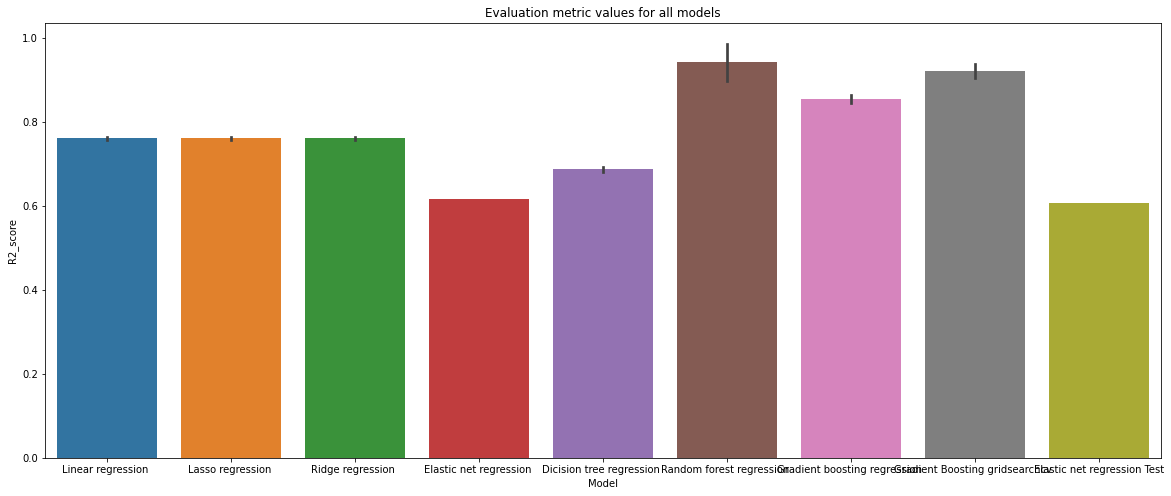

In [166]:
# Give a size 
fig,ax=plt.subplots(figsize=(20,8))

# Rented_Bike_Count v/s Month barplot
sns.barplot(data = result,x = 'Model',y = 'R2_score')

# Show the plot
plt.title('Evaluation metric values for all models')
plt.show()

• Random forest Regressor and Gradient Boosting gridsearchcv gives the highest R2 score of almost 99% and 93% respectively for Train Set 89% and 90% for Test set.

• Feature Importance value for Random Forest and Gradient Boost are different.

• We can deploy this model.